## Predicting Energy consumption in NYC

A Data-Driven Approach to Sustainable Urban Living"

Datasets: https://data.cityofnewyork.us/Environment/NYC-Building-Energy-and-Water-Data-Disclosure-for-/5zyy-y8am/about_data / https://www.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page


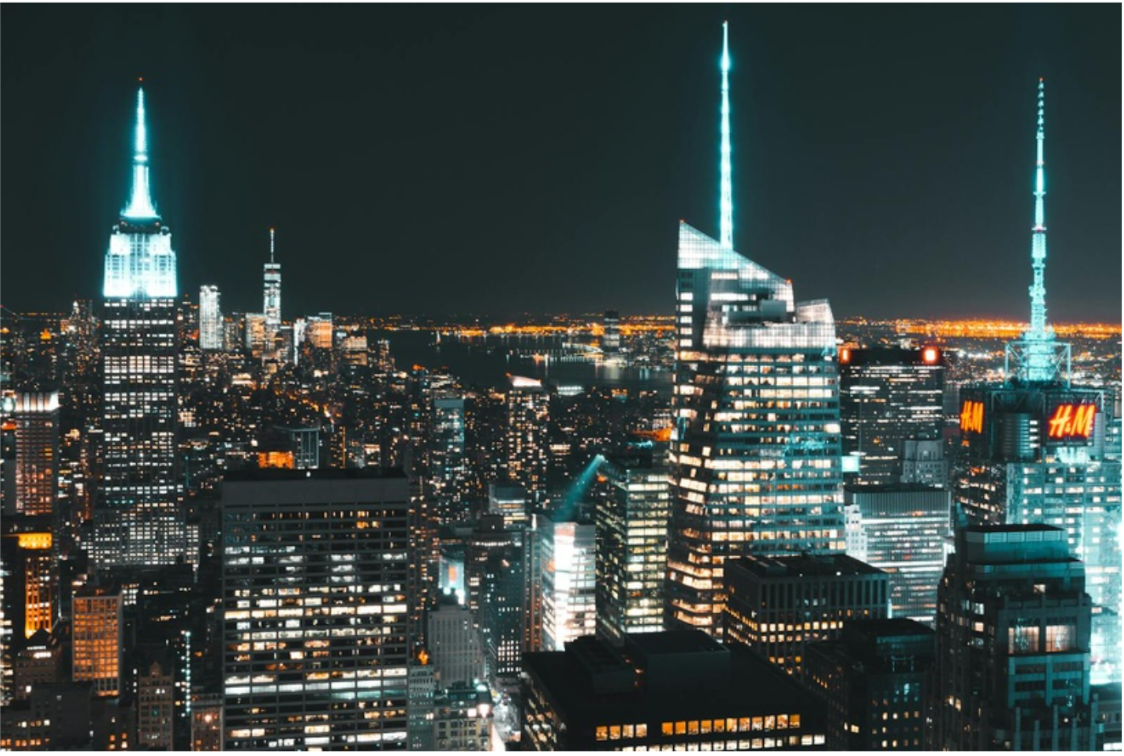

## Business Understanding:
This project centers on the analysis and prediction of energy consumption in buildings across New York City, with a focus on driving positive outcomes for various stakeholders. The intended audience includes urban planners, environmentalists, the New York State Government, real estate investors, and policymakers. The goal is to provide insights that can influence energy-efficient building practices, shape policies supporting sustainable living, and contribute to cost savings for individuals and businesses. By predicting energy efficiency trends, the project aims to guide strategic decisions that not only optimize resource usage and reduce environmental impact but also support economic development and enhance the overall resilience of the community


## Data Understanding

This project leverages two key datasets: The NYC Building Energy for Local Law 84 (2023-Present), providing information on energy usage for buildings exceeding 50,000 square feet, including details such as year built, address, and occupancy. Additionally, the Primary Land Use Tax Lot Output (PLUTO™) data file offers comprehensive land use and geographic data, featuring columns like address, number of buildings, number of floors, etc. The selection of these datasets are based on their extensive information content, with PLUTO™ comprising over 800,000 rows and 92 columns, and the NYC dataset containing 30,000 rows and 254 columns. Directly sourced from official websites, these datasets encompass diverse features, including building energy consumption, water usage, land use, zoning, building characteristics, and geographic information. Our study stands out for its unique approach to integrating these datasets, potentially offering valuable insights into the field of urban energy efficiency analysis.


In [1]:
# Importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV


In [ ]:
#Reading PLUTO dataset
df1=pd.read_csv('data/pluto_23v3_1.csv')

In [ ]:
#checkiing the shape()
df1.shape

In [ ]:
#checking the first 5 rows
df1.head()

In [ ]:
#checking the columns info
df1.info()

In [ ]:
#Convert the data set into lower case
df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df1

# Convert column names to lowercase
df1.columns = [col.lower() for col in df1.columns]
df1.head()

In [ ]:
df1['address'].value_counts()

In [ ]:
df1.isna().sum()

In [ ]:
df1.columns

## Reading df2

In [ ]:
#reading NYC Building energy
df2=pd.read_csv('data/NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84__2023-Present__20240129.csv')

In [ ]:
#checking the shape
df2.shape

In [ ]:
df2.info()

In [ ]:
#Reading df2.info()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display DataFrame information in a structured format
print(f"<class 'pandas.core.frame.DataFrame'>")
print(f"RangeIndex: {df2.shape[0]} entries, 0 to {df2.shape[0] - 1}")
print("Data columns (total %d columns):" % df2.shape[1])

# Loop through columns and display information for each
for i, column in enumerate(df2.columns):
    print(f" #   {i:2d} {column:20s} {df2[column].count():>13d} non-null  {df2[column].dtype.name:<8s}")

# Display memory usage information
print(f"dtypes: {df2.dtypes.value_counts().to_string()}")
print(f"memory usage: {df2.memory_usage(deep=True).sum() / (1024**2):.1f}+ MB")

# Reset display options to default values
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

In [ ]:
df2.head()

In [ ]:
# Convert column names to lowercase
df2.columns = [col.lower() for col in df2.columns]

#Convert the data set into lower case
df2 = df2.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df2.head()

In [ ]:
df2.info()

In [ ]:
list(df2.columns)

In [ ]:
#pip install fuzzywuzzy


## Merging using address 

In [ ]:
df1[['address','zmcode']]

In [ ]:
# Manual Cleaning of df1 address
df1['address'] = df1['address'].str.replace('-', '')  # Remove '-'
df1['address'] = df1['address'].str.split('/').str[0].str.strip() # Remove '/'

In [ ]:
df2[['address 1','postal code']]

In [ ]:
# Manual Cleaning of df2 address
df2['address 1'] = df2['address 1'].str.replace('-', '')  # Remove '-'
df2['address 1'] = df2['address 1'].str.split('/').str[0].str.strip()  # Remove '/'

In [ ]:
#Merging both datasets
df_m2 = pd.merge(df2, df1, left_on='address 1', right_on='address')
df_m2.shape

In [ ]:
#Merging both datasets
df_m = pd.merge(df1, df2, left_on='address', right_on='address 1')
df_m.shape

In [ ]:
df_m.to_csv('df_a_m.csv', index=False)

## EDA

In [2]:
#reading the merged dataset
df_a_m = pd.read_csv('df_a_m.csv', low_memory=False);

In [3]:
#checking the shape
df_a_m.shape #(9513, 346)

(9723, 346)

In [4]:
list(df_a_m.columns)

['borough_x',
 'block',
 'lot',
 'cd',
 'bct2020',
 'bctcb2020',
 'ct2010',
 'cb2010',
 'schooldist',
 'council',
 'zipcode',
 'firecomp',
 'policeprct',
 'healthcenterdistrict',
 'healtharea',
 'sanitboro',
 'sanitdistrict',
 'sanitsub',
 'address',
 'zonedist1',
 'zonedist2',
 'zonedist3',
 'zonedist4',
 'overlay1',
 'overlay2',
 'spdist1',
 'spdist2',
 'spdist3',
 'ltdheight',
 'splitzone',
 'bldgclass',
 'landuse',
 'easements',
 'ownertype',
 'ownername',
 'lotarea',
 'bldgarea',
 'comarea',
 'resarea',
 'officearea',
 'retailarea',
 'garagearea',
 'strgearea',
 'factryarea',
 'otherarea',
 'areasource',
 'numbldgs',
 'numfloors',
 'unitsres',
 'unitstotal',
 'lotfront',
 'lotdepth',
 'bldgfront',
 'bldgdepth',
 'ext',
 'proxcode',
 'irrlotcode',
 'lottype',
 'bsmtcode',
 'assessland',
 'assesstot',
 'exempttot',
 'yearbuilt',
 'yearalter1',
 'yearalter2',
 'histdist',
 'landmark',
 'builtfar',
 'residfar',
 'commfar',
 'facilfar',
 'borocode',
 'bbl',
 'condono',
 'tract2010',
 '

In [5]:
#checking for duplicates in property id
df_a_m['property id'].duplicated().value_counts()

property id
False    9212
True      511
Name: count, dtype: int64

In [6]:
#Dropping for duplicates in property id
df_a_m = df_a_m.drop_duplicates(subset='property id')

In [7]:
df_a_m.shape #(9030, 346)

(9212, 346)

# Drop unnecessary columns
#columns_to_drop = ['property id', 'property name', 'bbl']  
#df_a_m = df_a_m.drop(columns=columns_to_drop)

# Drop constant columns
df_a_m = df_a_m.loc[:, df_a_m.nunique() > 1]

In [8]:
df_a_m.shape #(9030, 346)

(9212, 346)

# Exclude non-numeric columns
numeric_df_a_m = df_a_m.select_dtypes(include=[np.number])

# Handle highly correlated features (example threshold: 0.95)
corr_matrix = numeric_df_a_m.corr()
#upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

In [9]:
#numeric_df_a_m.corr().abs()

In [10]:
#list_corr_df_am= list(numeric_df_a_m.corr().abs())
#Dropping the highly correlated columns 
#df_a_m = df_a_m.drop(columns=list_corr_df_am)


In [11]:
df_a_m.shape

(9212, 346)

In [12]:
df_a_m.duplicated().value_counts()

False    9212
Name: count, dtype: int64

In [13]:
df_a_m['postal code'].unique()

array(['10461', '11101', '11106', '11102', '10025', '11205', '10011',
       '10010', '11418', '11215', '10001', '11103', '11104', '11211',
       '11377', '11435', '11434', '11433', '11232', '10027', '11418-1751',
       '10016', '10017', '10006', '10024', '10455', '11228', '10463',
       '11209', '11217', '11218', '10018', '11238', '11432', '11368',
       '11373', '11423', '10475', '10028', '10023', '11229', '10022',
       '10456', '10301', '11374', '11365', '11436', '11355', '11354',
       '11427', '11249', '10034', '10014', '10013', '10002', '10012',
       '10004', '10003', '10459', '10470', '10309', '10038', '11201',
       '11237', '10453', '11235', '10040', '11109', '10452', '10473',
       '10036', '10019', '10165', '10065', '10021', '10172', '10167',
       '10171', '10466', '10075', '10170', '100196852', '10033', '10302',
       '10177', '10173', '10465', '10128', '10035', '10026', '10023-3244',
       '10029', '10031', '11206', '10037', '10454', '10009', '10472',
      

In [14]:
# Normalize the 'postal code' column to the first 5 characters ( from values '10012-4411')
df_a_m['postal code'] = df_a_m['postal code'].str[:5]

# Verify the update
df_a_m['postal code'].unique()

array(['10461', '11101', '11106', '11102', '10025', '11205', '10011',
       '10010', '11418', '11215', '10001', '11103', '11104', '11211',
       '11377', '11435', '11434', '11433', '11232', '10027', '10016',
       '10017', '10006', '10024', '10455', '11228', '10463', '11209',
       '11217', '11218', '10018', '11238', '11432', '11368', '11373',
       '11423', '10475', '10028', '10023', '11229', '10022', '10456',
       '10301', '11374', '11365', '11436', '11355', '11354', '11427',
       '11249', '10034', '10014', '10013', '10002', '10012', '10004',
       '10003', '10459', '10470', '10309', '10038', '11201', '11237',
       '10453', '11235', '10040', '11109', '10452', '10473', '10036',
       '10019', '10165', '10065', '10021', '10172', '10167', '10171',
       '10466', '10075', '10170', '10033', '10302', '10177', '10173',
       '10465', '10128', '10035', '10026', '10029', '10031', '11206',
       '10037', '10454', '10009', '10472', '10007', '10451', '10474',
       '10306', '104

In [15]:
df_a_m['postal code'].isna().sum()

0

In [16]:
df_a_m['address'].isna().sum()

0

In [17]:
df_a_m['year built'][:20]

0     1981
2     2015
18    1940
19    1937
20    1963
21    2008
22    1961
23    2007
24    2007
25    2008
26    1950
28    1950
29    2014
30    2002
31    2009
32    1920
34    2019
35    2002
36    2022
37    1951
Name: year built, dtype: int64

In [18]:
# Check for NaN values in the 'postal code' column
df_a_m['postal code'].isna().sum()

0

In [19]:
#pip install geopy

In [20]:
import pandas as pd

# Assuming df_a_m is your DataFrame

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display DataFrame information in a structured format
print(f"<class 'pandas.core.frame.DataFrame'>")
print(f"RangeIndex: {df_a_m.shape[0]} entries, 0 to {df_a_m.shape[0] - 1}")
print("Data columns (total %d columns):" % df_a_m.shape[1])

# Loop through columns and display information for each
for i, column in enumerate(df_a_m.columns):
    print(f" #   {i:2d} {column:20s} {df_a_m[column].count():>13d} non-null  {df_a_m[column].dtype.name:<8s}")

# Display memory usage information
print(f"dtypes: {df_a_m.dtypes.value_counts().to_string()}")
print(f"memory usage: {df_a_m.memory_usage(deep=True).sum() / (1024**2):.1f}+ MB")

# Reset display options to default values
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9212 entries, 0 to 9211
Data columns (total 346 columns):
 #    0 borough_x                     9212 non-null  object  
 #    1 block                         9212 non-null  int64   
 #    2 lot                           9212 non-null  int64   
 #    3 cd                            9209 non-null  float64 
 #    4 bct2020                       9209 non-null  float64 
 #    5 bctcb2020                     9209 non-null  float64 
 #    6 ct2010                        9209 non-null  float64 
 #    7 cb2010                        9209 non-null  float64 
 #    8 schooldist                    9141 non-null  float64 
 #    9 council                       9207 non-null  float64 
 #   10 zipcode                       9141 non-null  float64 
 #   11 firecomp                      9141 non-null  object  
 #   12 policeprct                    9141 non-null  float64 
 #   13 healthcenterdistrict          9141 non-null  float64 
 #   14 healtharea      

memory usage: 157.0+ MB


## Potential features

In [21]:
""""
# Selecting features_baselines 
Features=  'borough_x', 'lotarea', 'bldgarea', 'numbldgs', 'numfloors','unitstotal','assessland',
                                 'postal code','largest property use type - gross floor area (ft²)',
                                  'year built', 'construction status', 'number of buildings', 'occupancy',
                                 'property gfa - self-reported (ft²)',  'water use (all water sources) (kgal)',
                                 'total (location-based) ghg emissions (metric tons co2e)'    ]
                                 
Best Mode  === Linear Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.03378337559569033
R-Squared 0.968041818682259
Mean MSE:-cross val  2745772250922531.5
Model accuracy 0.9674890593752579


""";

In [22]:
""""
# Selecting features_Model 1
Features=  'borough_x', 'lotarea', 'bldgarea', 'numbldgs', 'numfloors','unitstotal','assessland',
                                 'postal code','largest property use type - gross floor area (ft²)',
                                  'year built', 'construction status', 'number of buildings', 'occupancy',
                                 'property gfa - self-reported (ft²)',    ]

Removing: 'water use (all water sources) (kgal)', 'total (location-based) ghg emissions (metric tons co2e)' 


Best Mode  === Linear Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.03378337559569033
R-Squared 0.968041818682259
Mean MSE:-cross val  2745772250922531.5
Model accuracy 0.9674890593752579



""";

# Selecting features_new models 
features_energy_efficiency = [ 'borough_x', 'lotarea', 'bldgarea', 'numbldgs', 'numfloors','unitstotal','assessland',
                                 'postal code','largest property use type - gross floor area (ft²)',
                                  'year built', 'construction status', 'number of buildings', 'occupancy',
                                 'property gfa - self-reported (ft²)', 
                              
                              ]
#removing 'primary property type - self selected',
#added: 'metered areas (energy)','national median energy star score'
#removed'bldgclass', 'bldgarea',  'assessland','assesstot',

In [82]:
# Selecting features_new models 0 Removing 
features_energy_efficiency = [  'borough_x','lotarea', 'bldgarea', 'numfloors','unitstotal','assessland',
                                 'postal code','largest property use type - gross floor area (ft²)',
                                  'year built', 'construction status', 'number of buildings', 'occupancy',
                                 'property gfa - self-reported (ft²)',  'water use (all water sources) (kgal)',
                                 'primary property type - self selected',
                             
                             ]

#'numbldgs' is the same as number of buildiing
#never use: bldgclass is emmpty

In [83]:
# For Energy Efficiency Analysis

target_energy_efficiency = 'site energy use (kbtu)' #'site eui (kbtu/ft²)

# Creating the subset DataFrame for Energy Efficiency
df_e = df_a_m[features_energy_efficiency + [target_energy_efficiency]]

In [84]:
df_e.shape

(9212, 16)

In [85]:
#checking the nulls 
df_e.isna().sum()

borough_x                                               0
lotarea                                                 1
bldgarea                                                0
numfloors                                             169
unitstotal                                              1
assessland                                              0
postal code                                             0
largest property use type - gross floor area (ft²)      0
year built                                              0
construction status                                     0
number of buildings                                     0
occupancy                                               0
property gfa - self-reported (ft²)                      0
water use (all water sources) (kgal)                    0
primary property type - self selected                   0
site energy use (kbtu)                                  0
dtype: int64

In [86]:
#Dropping the nulls
df_e=df_e.dropna()
df_e.shape

(9042, 16)

In [87]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9042 entries, 0 to 9721
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   borough_x                                           9042 non-null   object 
 1   lotarea                                             9042 non-null   float64
 2   bldgarea                                            9042 non-null   float64
 3   numfloors                                           9042 non-null   float64
 4   unitstotal                                          9042 non-null   float64
 5   assessland                                          9042 non-null   float64
 6   postal code                                         9042 non-null   object 
 7   largest property use type - gross floor area (ft²)  9042 non-null   float64
 8   year built                                          9042 non-null   int64  
 9   co

In [88]:
df_e.head()

borough_x   lotarea  bldgarea  numfloors  unitstotal  assessland  \
0         bx  316180.0  153816.0        2.0         3.0   2133000.0   
18        qn    9000.0   35568.0        6.0        48.0    364500.0   
19        qn    9313.0   29480.0        4.0        38.0    183150.0   
20        qn   30900.0   94250.0        6.0       125.0    599413.0   
22        mn  102811.0  324023.0       19.0       414.0   3074434.0   

   postal code  largest property use type - gross floor area (ft²)  \
0        10461                                           153816.0    
18       11106                                            38532.0    
19       11102                                            29480.0    
20       11102                                            99600.0    
22       10025                                           424552.0    

    year built construction status  number of buildings  occupancy  \
0         1981            existing                    1        100   
18        1940            existing                    1        100   
19        1937            existing                    1         95   
20        1963            existing                    1        100   
22        1961            existing                    1        100   

    property gfa - self-reported (ft²) water use (all water sources) (kgal)  \
0                             153816.0                               1101.6   
18                             38532.0                               1453.5   
19                             29480.0                               1239.8   
20                             99600.0                               4025.2   
22                            426042.0                                13352   

   primary property type - self selected site energy use (kbtu)  
0                                 office              7996944.3  
18                   multifamily housing               739486.5  
19                   multifamily housing              3213156.2  
20                   multifamily housing              4647605.3  
22                   multifamily housing             27710965.3

In [89]:
df_e['year built'].dtype

dtype('int64')

## delete
#convert object to numeric 
object_columns = df_e.select_dtypes(include=['object']).columns
print(object_columns)
# Convert each object column to numeric
for col in object_columns:
    df_e[col] = pd.to_numeric(df_e[col], errors='coerce');

# Convert object columns to numeric
object_columns = df_e.select_dtypes(include=['object']).columns
print(object_columns)

# Convert each object column to numeric using .loc
for col in object_columns:
    df_e.loc[:, col] = pd.to_numeric(df_e[col], errors='coerce')


## To delete
#no include 'borough_x','primary property type - self selected','construction status ',

object_columns = df_e.select_dtypes(include=['object']).columns
print(object_columns)

# List of columns to exclude
exclude_columns = ['borough_x', 'construction status', 'postal code', 'year built','primary property type - self selected'] #'primary property type - self selected', 
# Convert each object column to float, setting errors to NaN
for col in object_columns:
    if col not in exclude_columns:
        try:
            df_e[col] = df_e[col].astype(float)
        except ValueError:
            df_e[col] = pd.to_numeric(df_e[col], errors='coerce');

In [90]:
# Identify object columns
object_columns = df_e.select_dtypes(include=['object']).columns
print(object_columns)

# List of columns to exclude
exclude_columns = ['borough_x', 'construction status', 'postal code', 'year built', 'primary property type - self selected']

# Convert each object column to float, setting errors to NaN
for col in object_columns:
    if col not in exclude_columns:
        try:
            df_e[col] = df_e[col].astype(float)
        except ValueError:
            df_e.loc[:, col] = pd.to_numeric(df_e[col], errors='coerce')


Index(['borough_x', 'postal code', 'construction status',
       'water use (all water sources) (kgal)',
       'primary property type - self selected', 'site energy use (kbtu)'],
      dtype='object')


In [91]:
object_columns

Index(['borough_x', 'postal code', 'construction status',
       'water use (all water sources) (kgal)',
       'primary property type - self selected', 'site energy use (kbtu)'],
      dtype='object')

In [92]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9042 entries, 0 to 9721
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   borough_x                                           9042 non-null   object 
 1   lotarea                                             9042 non-null   float64
 2   bldgarea                                            9042 non-null   float64
 3   numfloors                                           9042 non-null   float64
 4   unitstotal                                          9042 non-null   float64
 5   assessland                                          9042 non-null   float64
 6   postal code                                         9042 non-null   object 
 7   largest property use type - gross floor area (ft²)  9042 non-null   float64
 8   year built                                          9042 non-null   int64  
 9   co

In [139]:
df_e['site energy use (kbtu)'] = df_e['site energy use (kbtu)'].astype(np.int64)

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_3552/2511134295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e['site energy use (kbtu)'] = df_e['site energy use (kbtu)'].astype(np.int64)


In [140]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8708 entries, 0 to 9721
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   borough_x                                           8708 non-null   object 
 1   lotarea                                             8708 non-null   float64
 2   bldgarea                                            8708 non-null   float64
 3   numfloors                                           8708 non-null   float64
 4   unitstotal                                          8708 non-null   float64
 5   assessland                                          8708 non-null   float64
 6   postal code                                         8708 non-null   object 
 7   largest property use type - gross floor area (ft²)  8708 non-null   float64
 8   year built                                          8708 non-null   int64  
 9   co

In [95]:
import pandas as pd

def map_year_built(year):
    if 1600 <= year <= 1899:
        return 1900
    elif 1901 <= year <= 1920:
        return 1920
    elif 1921 <= year <= 1940:
        return 1940
    elif 1941 <= year <= 1960:
        return 1960
    elif 1961 <= year <= 1980:
        return 1980
    elif 1981 <= year <= 2000:
        return 2000
    elif 2001 <= year <= 2023:
        return 2020
    else:
        return year  # If the year doesn't fall into any of the specified ranges

# Apply the mapping function to the 'year built' column using .loc
df_e.loc[:, 'year built'] = df_e['year built'].map(map_year_built)


In [96]:
# Convert 'year built' column to object type
df_e['year built'] = df_e['year built'].astype('int64')

In [97]:
df_e

borough_x   lotarea  bldgarea  numfloors  unitstotal  assessland  \
0           bx  316180.0  153816.0        2.0         3.0   2133000.0   
18          qn    9000.0   35568.0        6.0        48.0    364500.0   
19          qn    9313.0   29480.0        4.0        38.0    183150.0   
20          qn   30900.0   94250.0        6.0       125.0    599413.0   
22          mn  102811.0  324023.0       19.0       414.0   3074434.0   
...        ...       ...       ...        ...         ...         ...   
9717        bk    9375.0   36578.0        6.0        57.0    400950.0   
9718        mn   27900.0  258120.0       13.0         1.0   1808100.0   
9719        mn   27900.0  258120.0       13.0         1.0   1808100.0   
9720        bx   16268.0   72000.0        6.0        65.0     66150.0   
9721        bx   16268.0   72000.0        6.0        65.0     66150.0   

     postal code  largest property use type - gross floor area (ft²)  \
0          10461                                           153816.0    
18         11106                                            38532.0    
19         11102                                            29480.0    
20         11102                                            99600.0    
22         10025                                           424552.0    
...          ...                                                ...    
9717       11226                                            37492.0    
9718       10027                                           258120.0    
9719       10027                                           300000.0    
9720       10452                                            70250.0    
9721       10452                                           142250.0    

      year built construction status  number of buildings  occupancy  \
0           2000            existing                    1        100   
18          1940            existing                    1        100   
19          1940            existing                    1         95   
20          1980            existing                    1        100   
22          1980            existing                    1        100   
...          ...                 ...                  ...        ...   
9717        1940            existing                    1        100   
9718        1940            existing                    1         95   
9719        1940            existing                    1        100   
9720        1940            existing                    1        100   
9721        1940            existing                    2        100   

      property gfa - self-reported (ft²) water use (all water sources) (kgal)  \
0                               153816.0                               1101.6   
18                               38532.0                               1453.5   
19                               29480.0                               1239.8   
20                               99600.0                               4025.2   
22                              426042.0                              13352.0   
...                                  ...                                  ...   
9717                             37492.0                               2469.9   
9718                            258120.0                               5801.1   
9719                            300000.0                               5801.1   
9720                             72000.0                                  NaN   
9721                            144000.0                                  NaN   

     primary property type - self selected site energy use (kbtu)  
0                                   office              7996944.3  
18                     multifamily housing               739486.5  
19                     multifamily housing              3213156.2  
20                     multifamily housing              4647605.3  
22                     multifamily housing             27710965.3  
...              

In [141]:
df_e.describe()

lotarea      bldgarea    numfloors   unitstotal    assessland  \
count  8.708000e+03  8.708000e+03  8708.000000  8708.000000  8.708000e+03   
mean   3.662013e+04  9.713994e+04     7.699951    66.053859  1.347211e+06   
std    2.675675e+05  1.517386e+05     6.885765   111.912122  4.722750e+06   
min    5.490000e+02  8.000000e+02     1.000000     1.000000  0.000000e+00   
25%    9.300000e+03  3.553125e+04     5.000000    18.000000  1.447880e+05   
50%    1.350000e+04  5.424300e+04     6.000000    45.000000  3.267000e+05   
75%    2.503125e+04  9.613950e+04     7.000000    72.000000  8.722125e+05   
max    1.985040e+07  2.267925e+06    98.000000  4356.000000  1.944014e+08   

       largest property use type - gross floor area (ft²)   year built  \
count                                       8.708000e+03   8708.000000   
mean                                        1.076766e+05   1959.538356   
std                                         2.123645e+05     34.463757   
min                                         1.000000e+00   1900.000000   
25%                                         3.678150e+04   1940.000000   
50%                                         5.739000e+04   1940.000000   
75%                                         1.010865e+05   1980.000000   
max                                         8.481114e+06   2020.000000   

       number of buildings    occupancy  property gfa - self-reported (ft²)  \
count          8708.000000  8708.000000                        8.708000e+03   
mean              1.245521    97.596463                        1.120731e+05   
std               6.068188     9.033925                        2.224832e+05   
min               1.000000     5.000000                        1.000000e+00   
25%               1.000000   100.000000                        3.774700e+04   
50%               1.000000   100.000000                        5.851450e+04   
75%               1.000000   100.000000                        1.038670e+05   
max             514.000000   100.000000                        8.811722e+06   

       water use (all water sources) (kgal)  site energy use (kbtu)  
count                           8708.000000            8.708000e+03  
mean                            5342.842589            9.276939e+06  
std                            12738.952723            3.576045e+07  
min                                0.000000            0.000000e+00  
25%                             2193.300000            2.775156e+06  
50%                             5019.100000            4.596222e+06  
75%                             5328.308788            7.770454e+06  
max                           695904.500000            2.208957e+09

In [142]:
df_e.isna().sum()

borough_x                                             0
lotarea                                               0
bldgarea                                              0
numfloors                                             0
unitstotal                                            0
assessland                                            0
postal code                                           0
largest property use type - gross floor area (ft²)    0
year built                                            0
construction status                                   0
number of buildings                                   0
occupancy                                             0
property gfa - self-reported (ft²)                    0
water use (all water sources) (kgal)                  0
primary property type - self selected                 0
site energy use (kbtu)                                0
dtype: int64

In [143]:
# Calculate the mean value of water use (all water sources) (kgal)
mean_water_use = df_e['water use (all water sources) (kgal)'].mean()

# Impute NaN values with the mean value
df_e['water use (all water sources) (kgal)'].fillna(mean_water_use, inplace=True)

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_3552/4047207097.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e['water use (all water sources) (kgal)'].fillna(mean_water_use, inplace=True)


In [144]:
# lets drop the nan and the not available rows for kbtu/ft2
import numpy as np
df_e= df_e[~df_e[target_energy_efficiency].isin(['not available', np.nan])]
df_e.head()

borough_x   lotarea  bldgarea  numfloors  unitstotal  assessland  \
0         bx  316180.0  153816.0        2.0         3.0   2133000.0   
18        qn    9000.0   35568.0        6.0        48.0    364500.0   
19        qn    9313.0   29480.0        4.0        38.0    183150.0   
20        qn   30900.0   94250.0        6.0       125.0    599413.0   
22        mn  102811.0  324023.0       19.0       414.0   3074434.0   

   postal code  largest property use type - gross floor area (ft²)  \
0        10461                                           153816.0    
18       11106                                            38532.0    
19       11102                                            29480.0    
20       11102                                            99600.0    
22       10025                                           424552.0    

    year built construction status  number of buildings  occupancy  \
0         2000            existing                    1        100   
18        1940            existing                    1        100   
19        1940            existing                    1         95   
20        1980            existing                    1        100   
22        1980            existing                    1        100   

    property gfa - self-reported (ft²)  water use (all water sources) (kgal)  \
0                             153816.0                                1101.6   
18                             38532.0                                1453.5   
19                             29480.0                                1239.8   
20                             99600.0                                4025.2   
22                            426042.0                               13352.0   

   primary property type - self selected  site energy use (kbtu)  
0                                 office                 7996944  
18                   multifamily housing                  739486  
19                   multifamily housing                 3213156  
20                   multifamily housing                 4647605  
22                   multifamily housing                27710965

In [145]:
#Sanity check 
df_e.isna().sum()

borough_x                                             0
lotarea                                               0
bldgarea                                              0
numfloors                                             0
unitstotal                                            0
assessland                                            0
postal code                                           0
largest property use type - gross floor area (ft²)    0
year built                                            0
construction status                                   0
number of buildings                                   0
occupancy                                             0
property gfa - self-reported (ft²)                    0
water use (all water sources) (kgal)                  0
primary property type - self selected                 0
site energy use (kbtu)                                0
dtype: int64

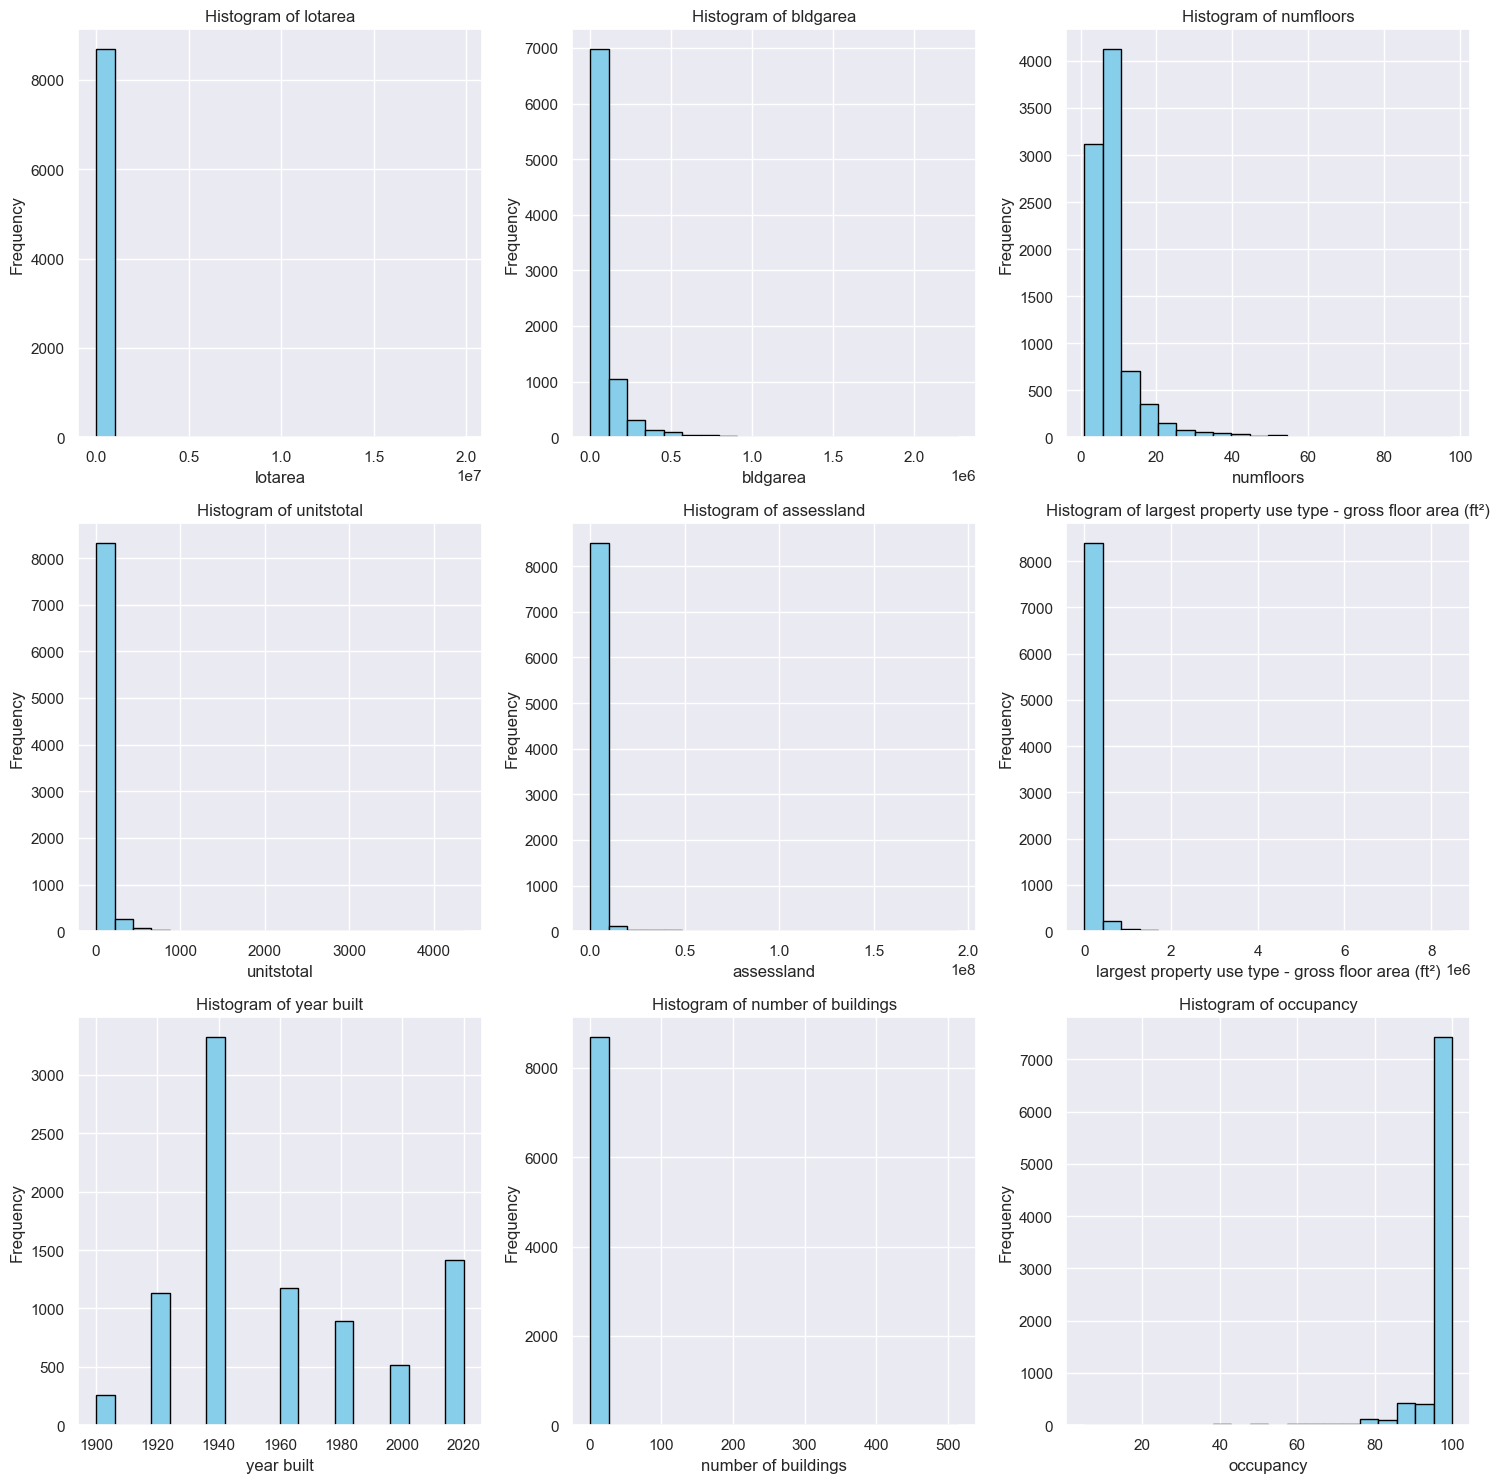

In [146]:

# Number of rows and columns in the grid
n_rows, n_cols = 3, 3

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()  

# Plotting histograms for each numeric column
for i, column in enumerate(df_e.select_dtypes(include=np.number).columns):
    if i >= n_rows * n_cols:  
        break
    axes[i].hist(df_e[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for ax in axes[i+1:]:
    ax.remove()

plt.tight_layout()
plt.show()

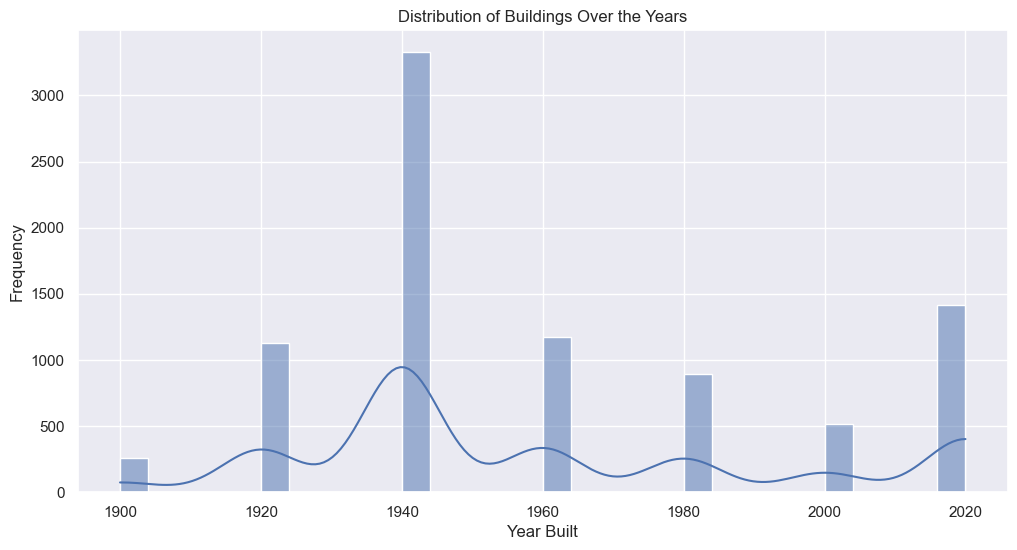

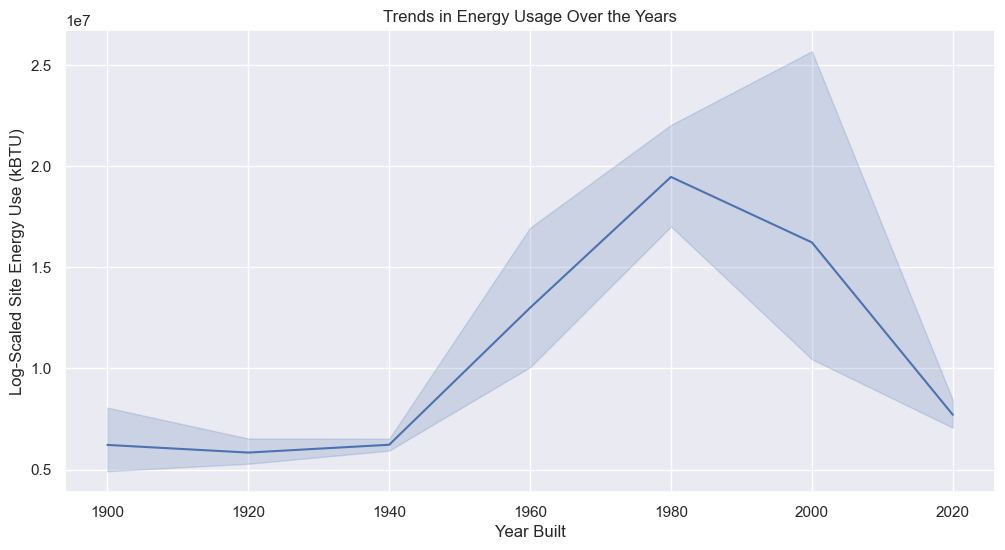

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of buildings over the years
plt.figure(figsize=(12, 6))
sns.histplot(df_e['year built'] , bins=30, kde=True)
plt.title('Distribution of Buildings Over the Years')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

#df_e['year built'] = df_e['year built'].apply(lambda x: max(1900, x))

# Trends in energy usage over the years
plt.figure(figsize=(12, 6))
#sns.lineplot(x='year built', y='site energy use (kbtu)', data=df_e)
sns.lineplot(x='year built', y='site energy use (kbtu)', data=df_e)
plt.title('Trends in Energy Usage Over the Years')
plt.xlabel('Year Built')
plt.ylabel('Log-Scaled Site Energy Use (kBTU)')
plt.show()

In [148]:
df_e['year built'].value_counts()

year built
1940    3326
2020    1414
1960    1171
1920    1131
1980     892
2000     515
1900     259
Name: count, dtype: int64

In [149]:
df_e.isnull().sum() #postal code 3881

borough_x                                             0
lotarea                                               0
bldgarea                                              0
numfloors                                             0
unitstotal                                            0
assessland                                            0
postal code                                           0
largest property use type - gross floor area (ft²)    0
year built                                            0
construction status                                   0
number of buildings                                   0
occupancy                                             0
property gfa - self-reported (ft²)                    0
water use (all water sources) (kgal)                  0
primary property type - self selected                 0
site energy use (kbtu)                                0
dtype: int64

In [150]:
df_e.shape

(8708, 16)

In [151]:
#df_e=df_e.dropna()

In [152]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8708 entries, 0 to 9721
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   borough_x                                           8708 non-null   object 
 1   lotarea                                             8708 non-null   float64
 2   bldgarea                                            8708 non-null   float64
 3   numfloors                                           8708 non-null   float64
 4   unitstotal                                          8708 non-null   float64
 5   assessland                                          8708 non-null   float64
 6   postal code                                         8708 non-null   object 
 7   largest property use type - gross floor area (ft²)  8708 non-null   float64
 8   year built                                          8708 non-null   int64  
 9   co

In [153]:
# Create a list of numerical column names
num = df_e.select_dtypes(include=['float64', 'int64']).columns.tolist()


print("Numerical columns:", num)
#print("Categorical columns:", cat)

Numerical columns: ['lotarea', 'bldgarea', 'numfloors', 'unitstotal', 'assessland', 'largest property use type - gross floor area (ft²)', 'year built', 'number of buildings', 'occupancy', 'property gfa - self-reported (ft²)', 'water use (all water sources) (kgal)', 'site energy use (kbtu)']


In [154]:
# Create a list of numerical column names
num = df_e.select_dtypes(include=['float64', 'int64']).columns.tolist()

num_exception = ['numfloors', 'unitstotal','year built', 'number of buildings', 'occupancy']


# Update num and cat list by removing exceptions
num_up = [column for column in num if column not in num_exception]



In [155]:
# Drop rows with zero values in specified columns
df_e = df_e[df_e[num_exception].astype(bool).all(axis=1)]



In [156]:
df_e.shape#(8870, 17)

(8708, 16)

In [157]:
# Create copies of df_e for logarithmic and square root transformations
df_e_lt = df_e.copy()
df_e_srt = df_e.copy()

In [158]:
# Apply logarithmic transformation and create new columns
for col in num_up :
    # Transforming and creating new columns
    df_e_lt[col + '_log'] = np.log(df_e_lt[col] + 1)

# Drop the original columns that were transformed
df_e_lt.drop(columns=num_up, inplace=True)

In [159]:
df_e_lt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8708 entries, 0 to 9721
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   borough_x                                               8708 non-null   object 
 1   numfloors                                               8708 non-null   float64
 2   unitstotal                                              8708 non-null   float64
 3   postal code                                             8708 non-null   object 
 4   year built                                              8708 non-null   int64  
 5   construction status                                     8708 non-null   object 
 6   number of buildings                                     8708 non-null   int64  
 7   occupancy                                               8708 non-null   int64  
 8   primary property type - self selected      

In [160]:
# Apply square root transformation and create new columns
for col in num_up:
    # Transforming and creating new columns
    df_e_srt[col + '_sqrt'] = np.sqrt(df_e_srt[col])

# Drop the original columns that were transformed
df_e_srt.drop(columns=num_up, inplace=True)

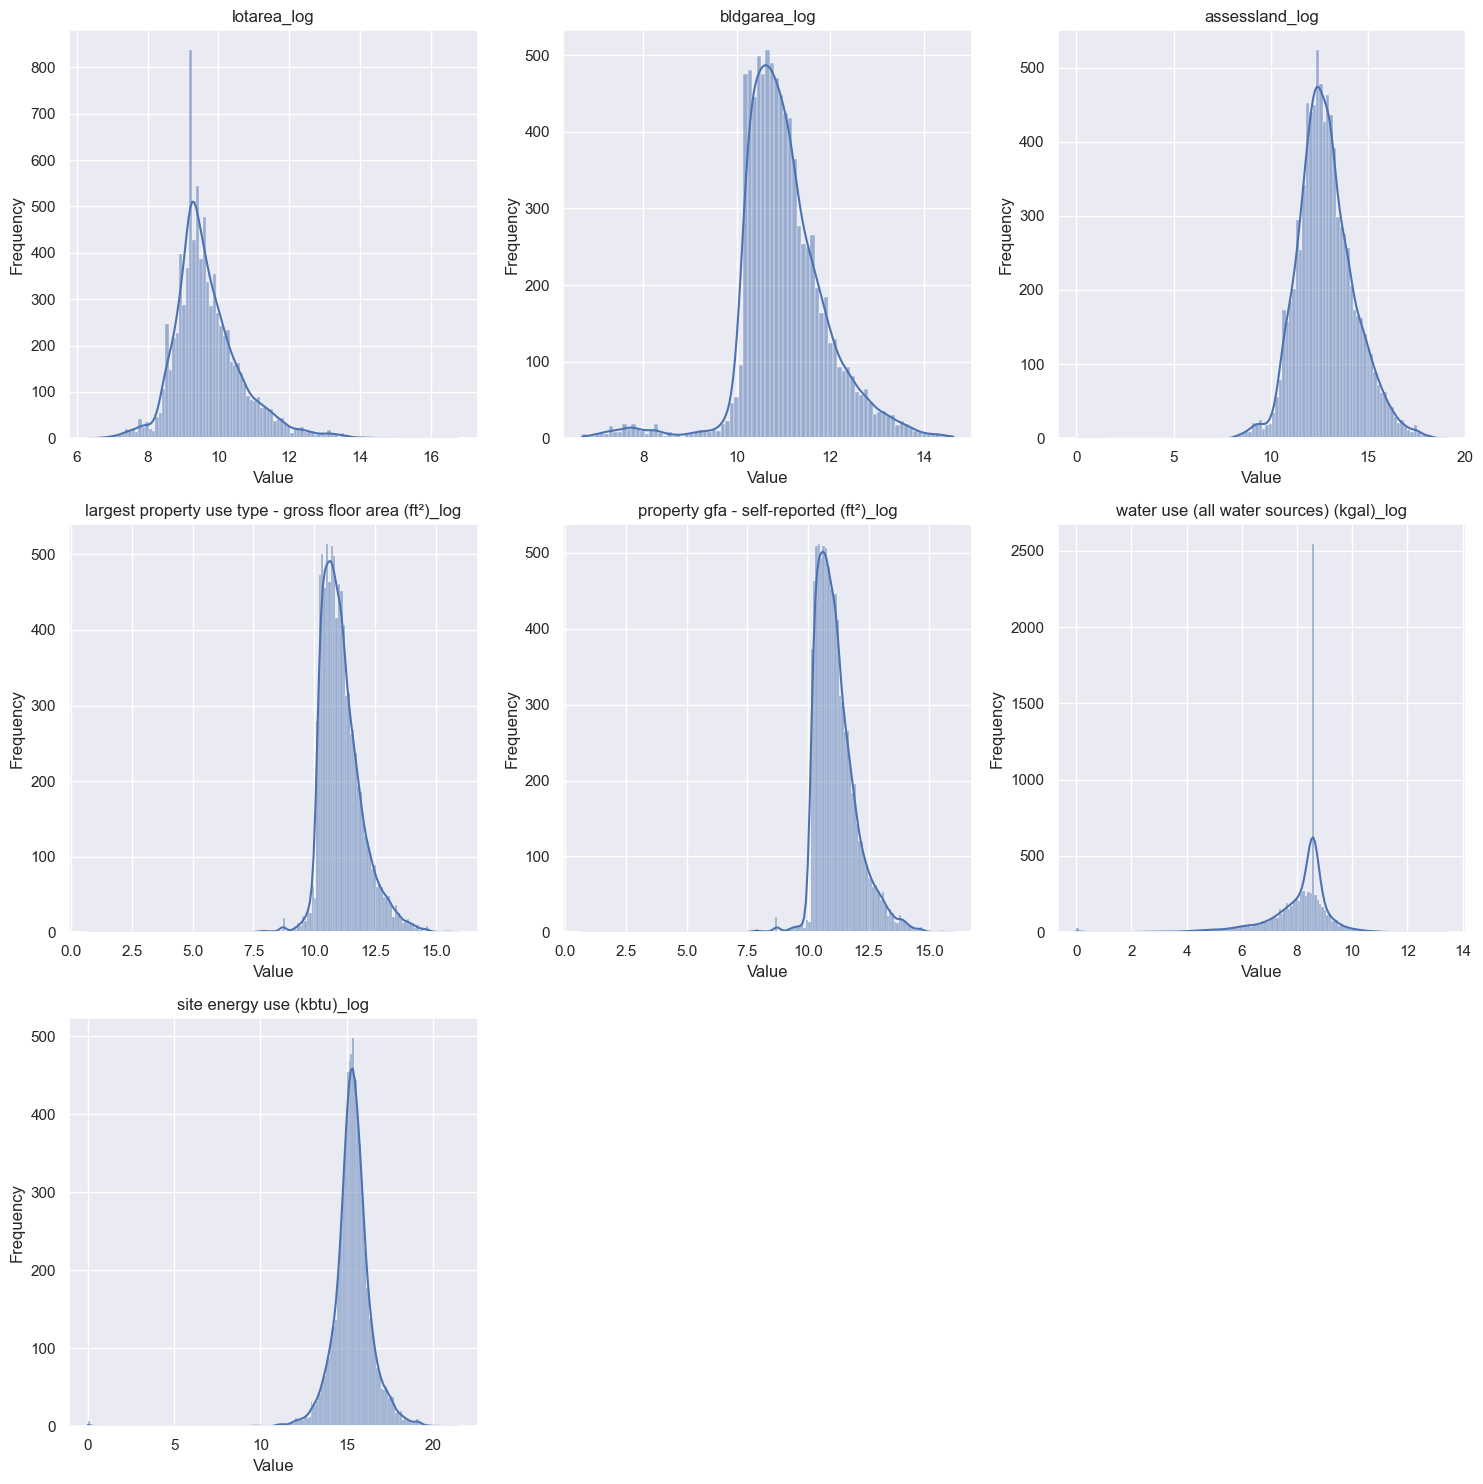

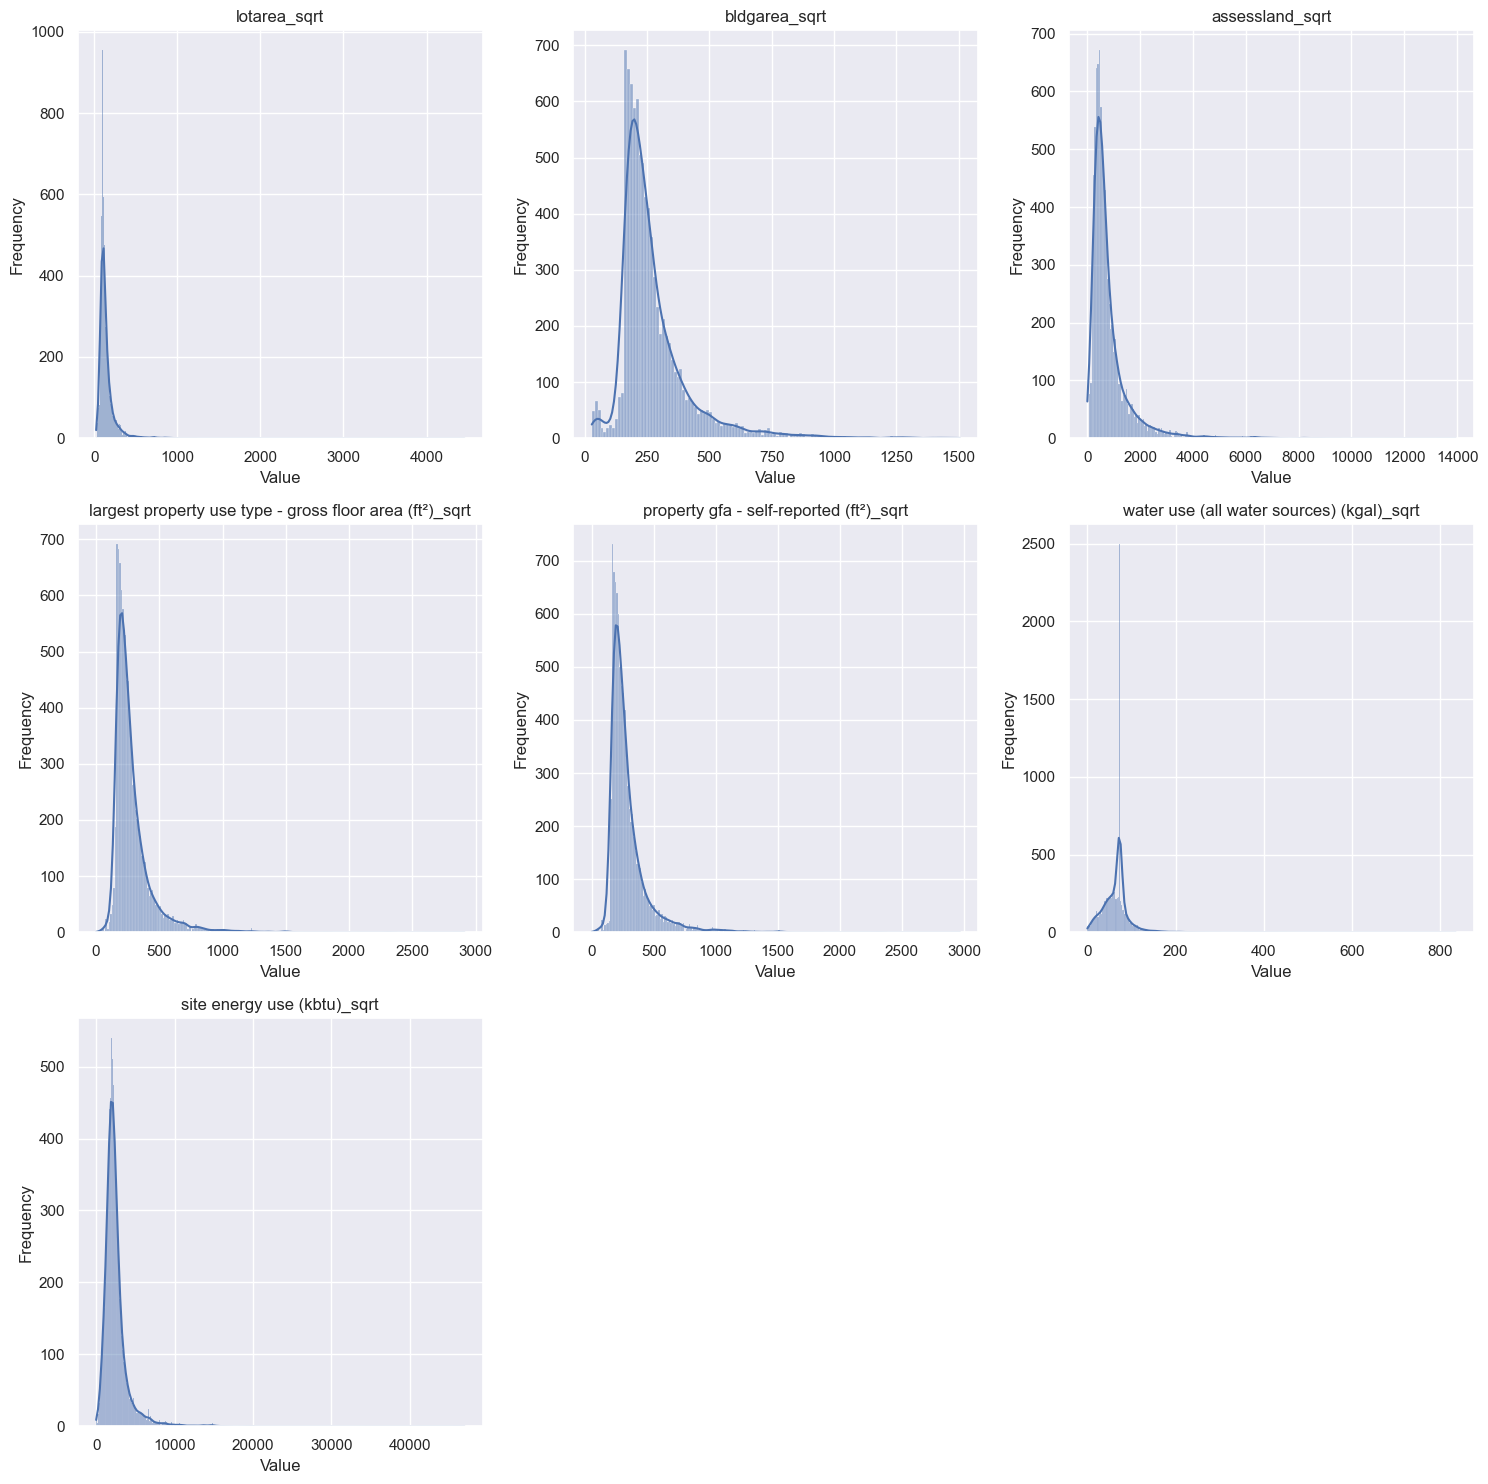

In [161]:
# Function to create 3x3 grid of histograms for columns ending with a specific suffix
def plot_transformed_columns_3x3(df, suffix):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()  # Flatten the 3x3 matrix of axes

    # Filter columns that end with the specified suffix
    columns_to_plot = [col for col in df.columns if col.endswith(suffix)]

    # Adjust the number of plots based on the number of columns
    num_plots = min(len(columns_to_plot), 9)

    for i in range(num_plots):
        col = columns_to_plot[i]
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')

    # Hide any empty subplots
    for j in range(num_plots, 9):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Visualize the columns ending with '_log' in df_e_lt
plot_transformed_columns_3x3(df_e_lt, '_log')

plot_transformed_columns_3x3(df_e_srt, '_sqrt')

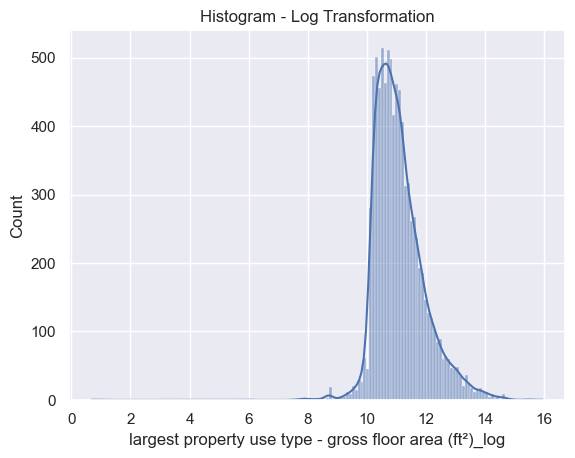

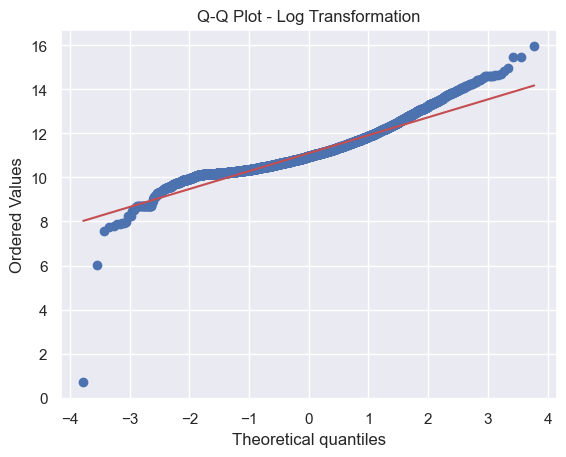

In [162]:
#visualizing the distribution 

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


# Function to create a Q-Q plot
def qq_plot(data, title):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.show()

# selecting column
column = 'largest property use type - gross floor area (ft²)_log'

# Histogram and Q-Q plot for Log Transformation
sns.histplot(df_e_lt[column], kde=True)
plt.title('Histogram - Log Transformation')
plt.show()

qq_plot(df_e_lt[column], 'Q-Q Plot - Log Transformation')



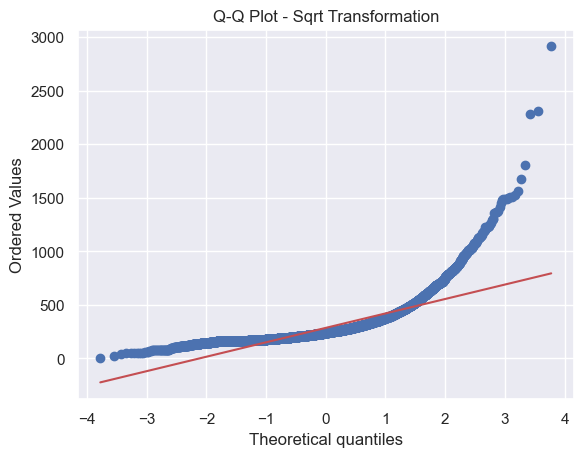

In [163]:
column = 'largest property use type - gross floor area (ft²)_sqrt'
qq_plot(df_e_srt[column], 'Q-Q Plot - Sqrt Transformation')

In [164]:
# As we can see, the distribution wiitth log is closer to the normal  


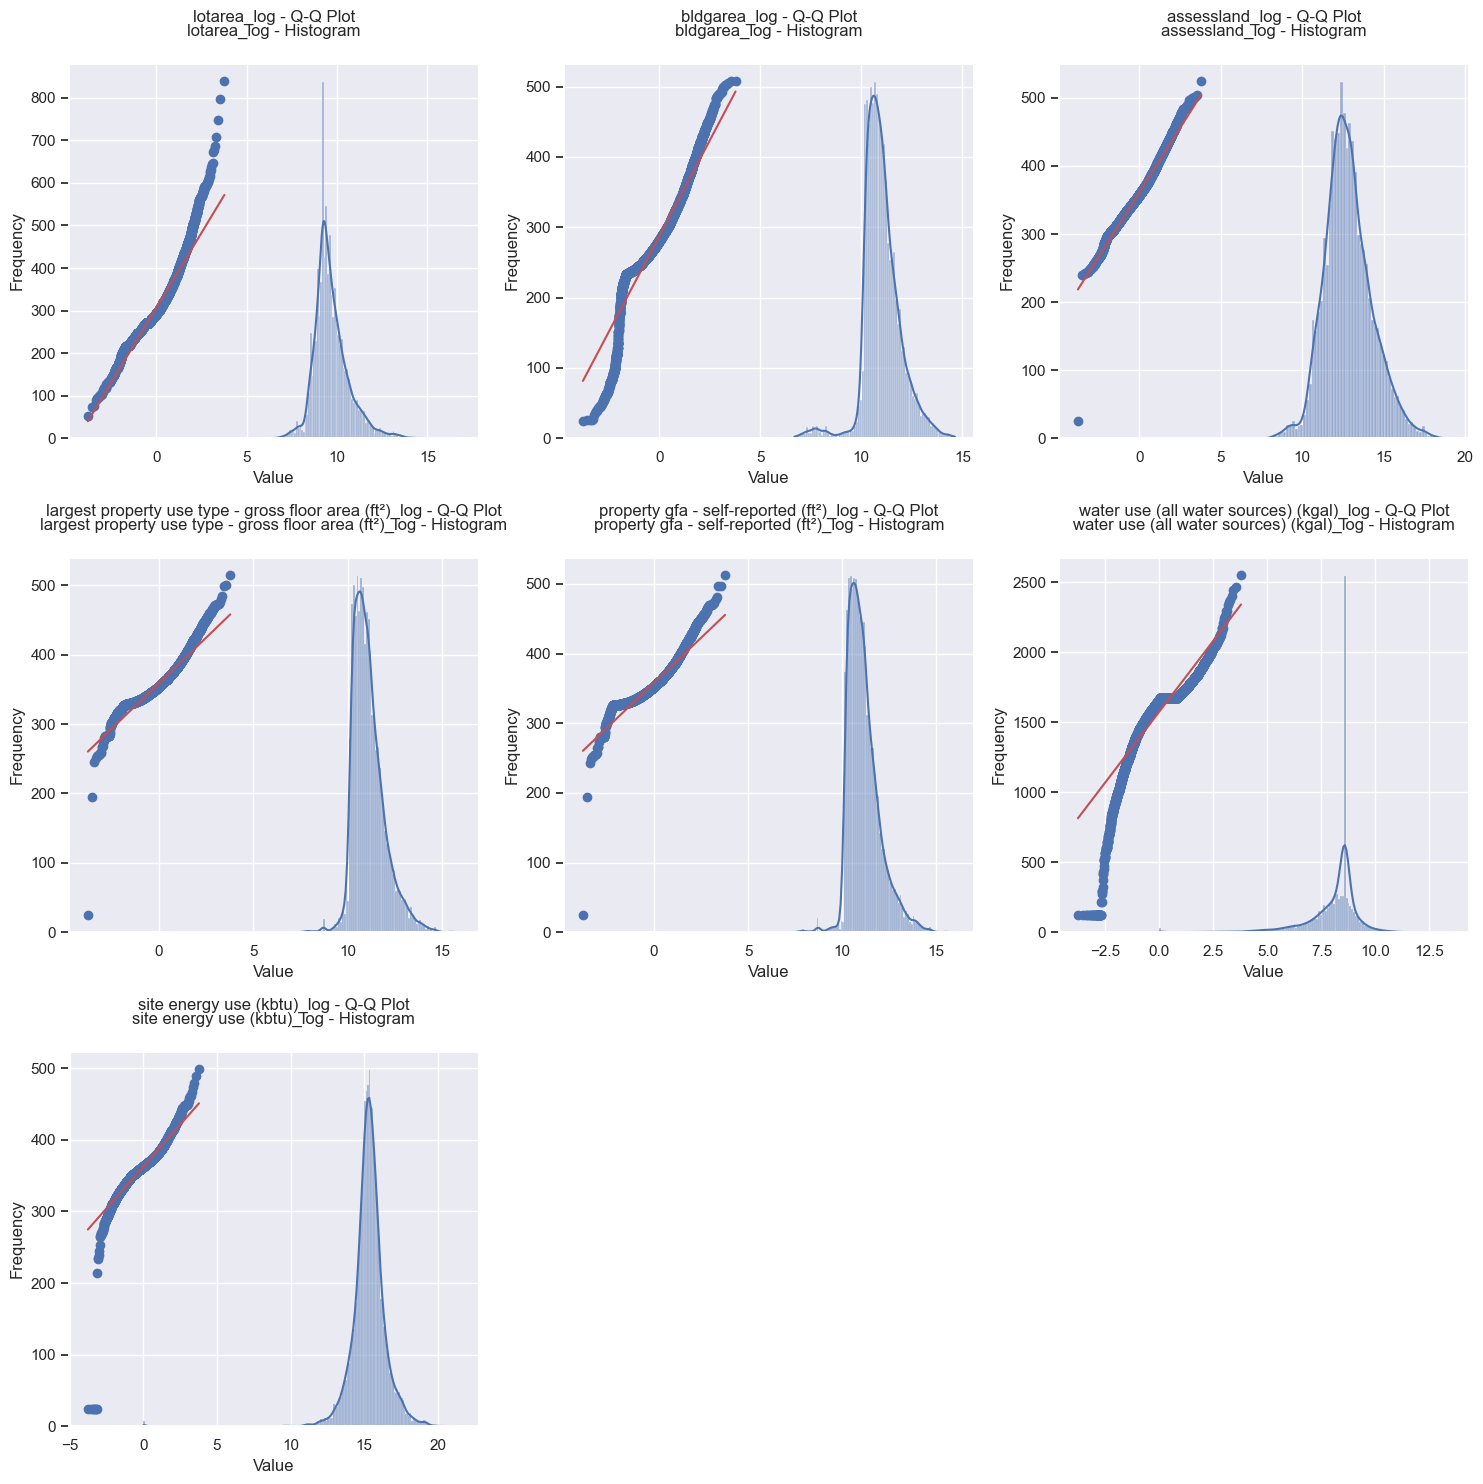

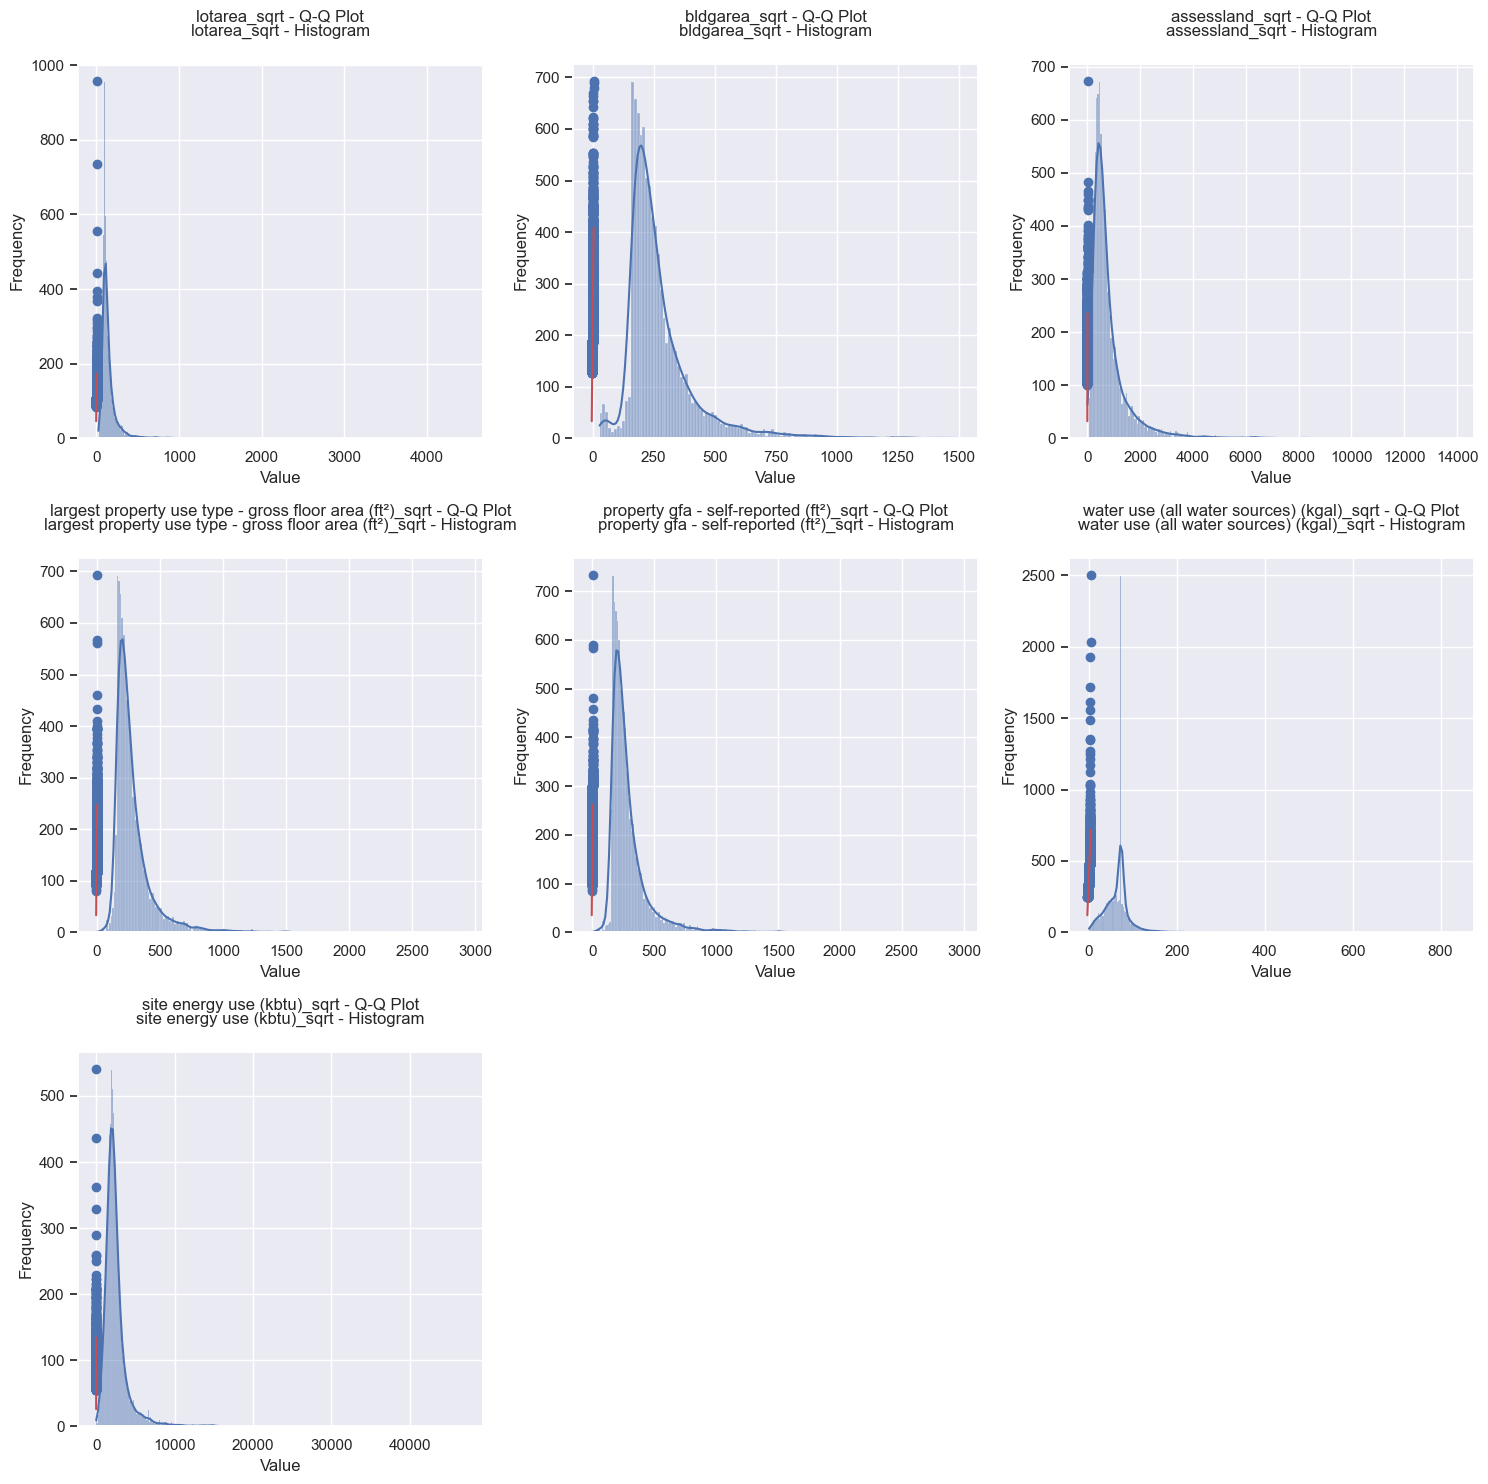

In [165]:

# Function to create 3x3 grid of histograms and Q-Q plots for columns ending with a specific suffix
def plot_transformed_columns_3x3(df, suffix):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()  # Flatten the 3x3 matrix of axes

    # Filter columns that end with the specified suffix
    columns_to_plot = [col for col in df.columns if col.endswith(suffix)]

    # Adjust the number of plots based on the number of columns
    num_plots = min(len(columns_to_plot), 9)

    for i in range(num_plots):
        col = columns_to_plot[i]

        # Plot Histogram
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'{col} - Histogram', pad=20)  # Adjust the pad parameter for space
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')

        # Plot Q-Q Plot
        qq_axes = axes[i].twinx()  # Create a twin Axes sharing the x-axis
        qq_axes.yaxis.set_visible(False)  # Hide the y-axis for Q-Q plot
        stats.probplot(df[col], dist="norm", plot=qq_axes)
        qq_axes.set_title(f'{col} - Q-Q Plot', pad=30)  # Adjust the pad parameter for space

    # Hide any empty subplots
    for j in range(num_plots, 9):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Visualize the columns ending with '_log' in df_e_lt
plot_transformed_columns_3x3(df_e_lt, '_log')
plot_transformed_columns_3x3(df_e_srt, '_sqrt')

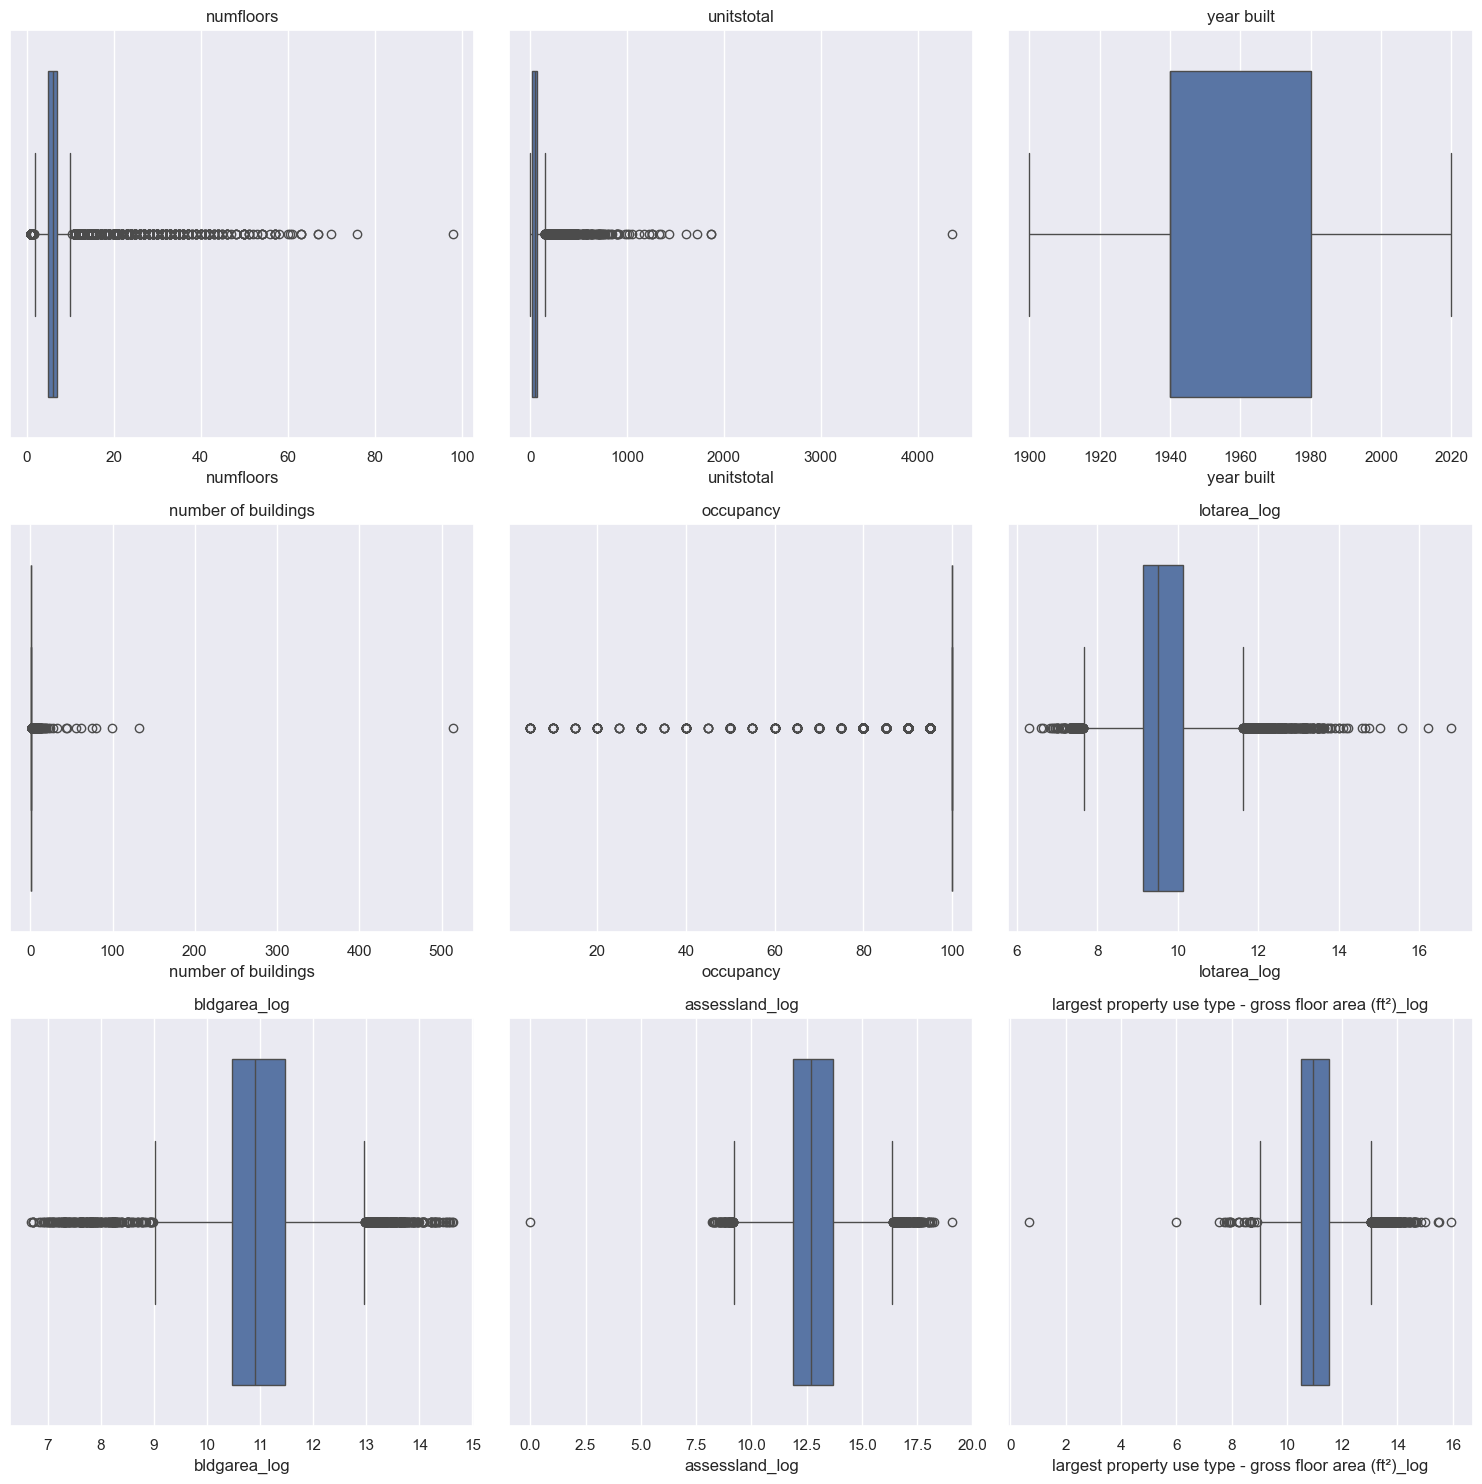

In [166]:

# Set the aesthetic style of the plots
sns.set()

# Select only numerical columns for plotting
numerical_columns = df_e_lt.select_dtypes(include=[np.number]).columns

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 3x3 matrix of axes

# Plot boxplots in the grid
for i, col in enumerate(numerical_columns):
    if i < 9:  # Ensure we don't go beyond 9 plots
        sns.boxplot(x=df_e_lt[col], ax=axes[i])
        axes[i].set_title(col)
    else:
        break  

# Hide any unused subplots
for j in range(i, 9):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [167]:
#sns.pairplot(df_e_lt)

In [168]:
df_e_lt_numeric = df_e_lt.select_dtypes(include=['float64', 'int64'])


In [169]:
#sns.pairplot(df_e_lt_numeric)

In [173]:
#selecting columns to plot
columns_to_plot = [
    'lotarea_log',
    'bldgarea_log',
    
    'assessland_log',
    'site energy use (kbtu)_log','largest property use type - gross floor area (ft²)_log',
     'property gfa - self-reported (ft²)_log'
]

In [174]:
df_e_lt

borough_x  numfloors  unitstotal postal code  year built  \
0           bx        2.0         3.0       10461        2000   
18          qn        6.0        48.0       11106        1940   
19          qn        4.0        38.0       11102        1940   
20          qn        6.0       125.0       11102        1980   
22          mn       19.0       414.0       10025        1980   
...        ...        ...         ...         ...         ...   
9717        bk        6.0        57.0       11226        1940   
9718        mn       13.0         1.0       10027        1940   
9719        mn       13.0         1.0       10027        1940   
9720        bx        6.0        65.0       10452        1940   
9721        bx        6.0        65.0       10452        1940   

     construction status  number of buildings  occupancy  \
0               existing                    1        100   
18              existing                    1        100   
19              existing                    1         95   
20              existing                    1        100   
22              existing                    1        100   
...                  ...                  ...        ...   
9717            existing                    1        100   
9718            existing                    1         95   
9719            existing                    1        100   
9720            existing                    1        100   
9721            existing                    2        100   

     primary property type - self selected  lotarea_log  bldgarea_log  \
0                                   office    12.664070     11.943519   
18                     multifamily housing     9.105091     10.479230   
19                     multifamily housing     9.139274     10.291501   
20                     multifamily housing    10.338544     11.453717   
22                     multifamily housing    11.540657     12.688573   
...                                    ...          ...           ...   
9717                   multifamily housing     9.145909     10.507230   
9718              residence hall/dormitory    10.236418     12.461184   
9719              residence hall/dormitory    10.236418     12.461184   
9720                   multifamily housing     9.697017     11.184435   
9721                   multifamily housing     9.697017     11.184435   

      assessland_log  largest property use type - gross floor area (ft²)_log  \
0          14.573040                                          11.943519        
18         12.806285                                          10.559270        
19         12.118066                                          10.291501        
20         13.303708                                          11.508927        
22         14.938632                                          12.958792        
...              ...                                                ...        
9717       12.901595                                          10.531910        
9718       14.407788                                          12.461184        
9719       14.407788                                          12.611541        
9720       11.099695                                          11.159830        
9721       11.099695                                          11.865348        

      property gfa - self-reported (ft²)_log  \
0                                  11.943519   
18                                 10.559270   
19                                 10.291501   
20                                 11.508927   
22                                 12.962296   
...                                      ...   
9717                               10.531910   
9718                               12.461184   
9719                               12.611541   
9720                               11.184435   
9721                               11.877576   

      water use (all water sources) (kgal)_log  site energy use (kbtu)_log  
0          

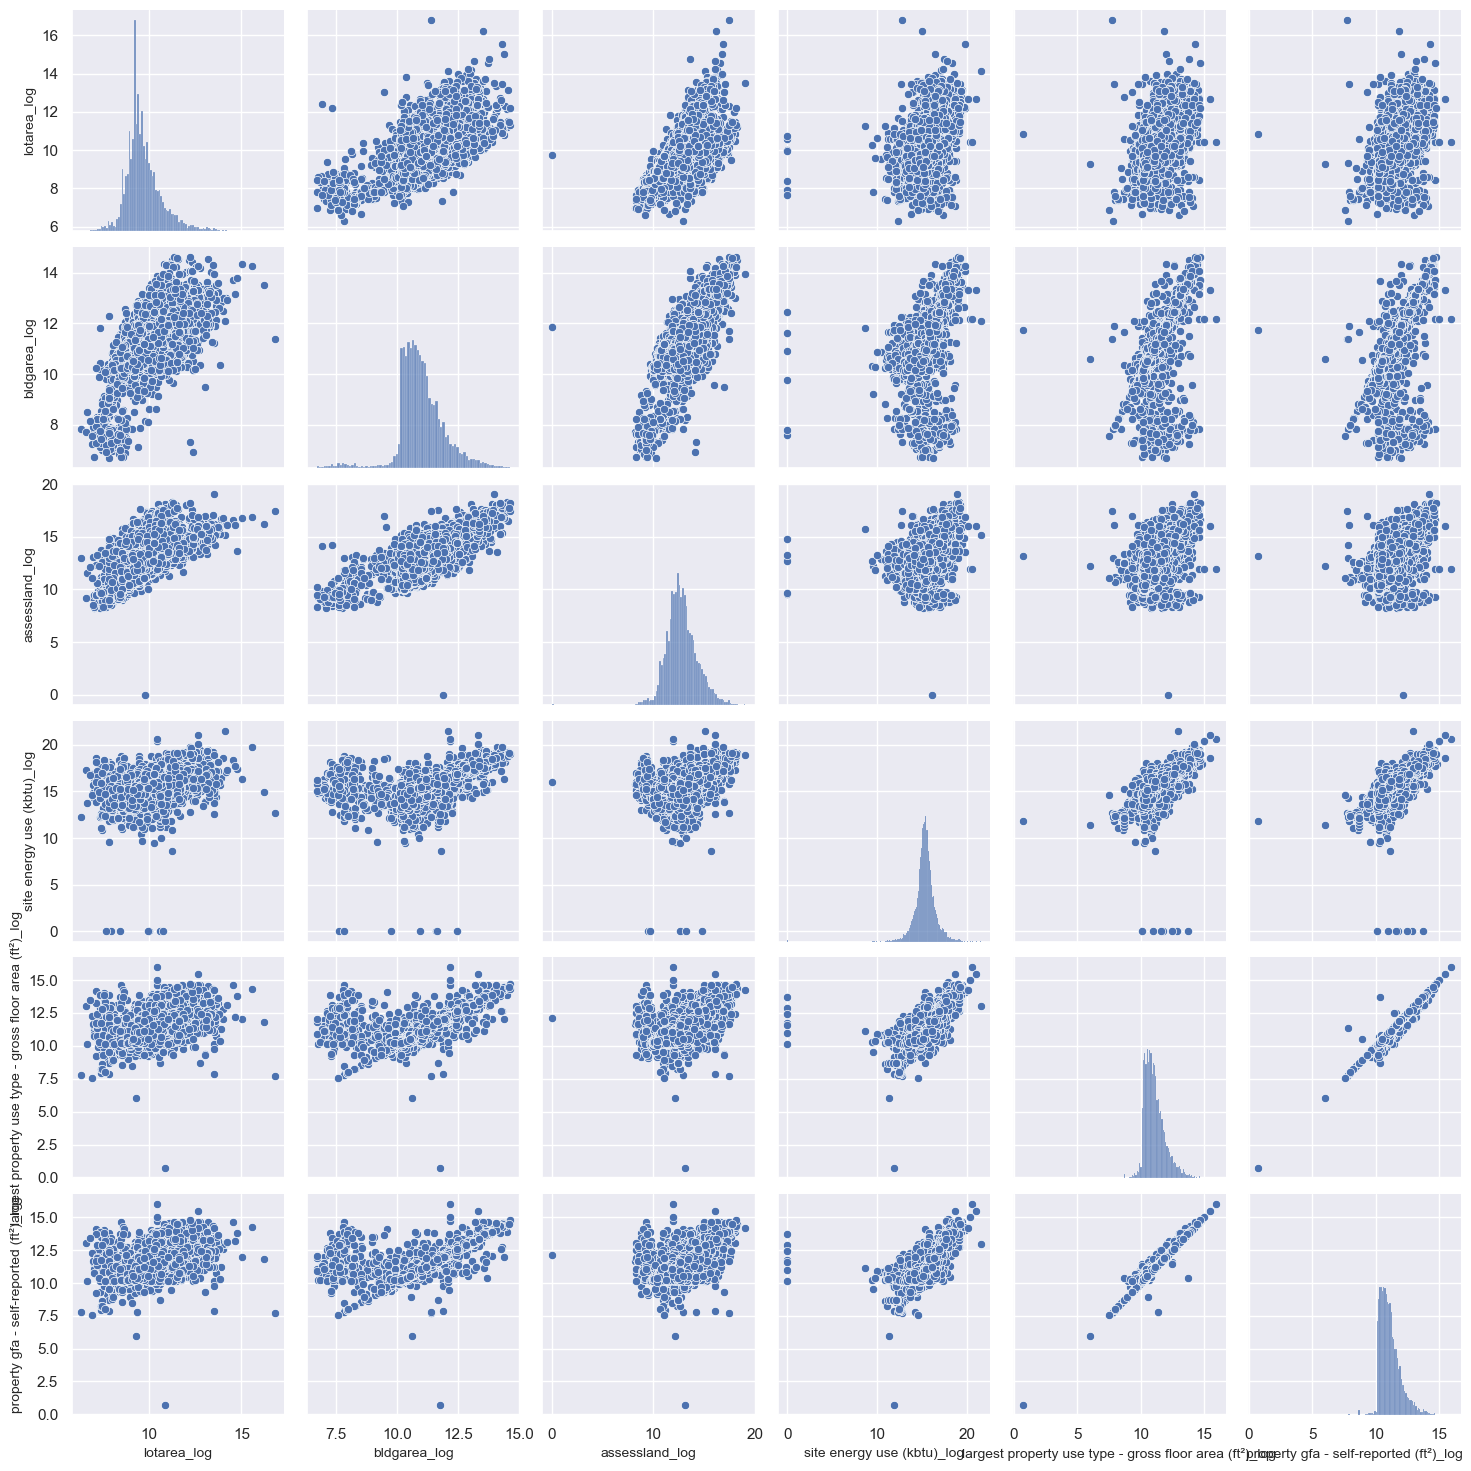

In [175]:
import seaborn as sns


# Create a pairplot and assign it to pair_plot
plot = sns.pairplot(df_e_lt[columns_to_plot])

# Adjust label sizes in the pairplot
for ax in plot.axes.flatten():
    # Adjust x-axis label font size
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10)
    # Adjust y-axis label font size
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10)

plt.show()

In [176]:
df_e_lt_numeric.corr()

numfloors  unitstotal  \
numfloors                                            1.000000    0.402347   
unitstotal                                           0.402347    1.000000   
year built                                           0.185955    0.129811   
number of buildings                                 -0.018303    0.054552   
occupancy                                           -0.073235    0.046599   
lotarea_log                                          0.035157    0.291634   
bldgarea_log                                         0.561360    0.449977   
assessland_log                                       0.518211    0.262794   
largest property use type - gross floor area (f...   0.554833    0.456069   
property gfa - self-reported (ft²)_log               0.560522    0.450175   
water use (all water sources) (kgal)_log             0.223853    0.276633   
site energy use (kbtu)_log                           0.418645    0.358360   

                                                    year built  \
numfloors                                             0.185955   
unitstotal                                            0.129811   
year built                                            1.000000   
number of buildings                                   0.005111   
occupancy                                            -0.061258   
lotarea_log                                           0.219463   
bldgarea_log                                          0.156881   
assessland_log                                        0.195363   
largest property use type - gross floor area (f...    0.159087   
property gfa - self-reported (ft²)_log                0.163241   
water use (all water sources) (kgal)_log              0.018338   
site energy use (kbtu)_log                            0.065010   

                                                    number of buildings  \
numfloors                                                     -0.018303   
unitstotal                                                     0.054552   
year built                                                     0.005111   
number of buildings                                            1.000000   
occupancy                                                      0.002302   
lotarea_log                                                    0.094361   
bldgarea_log                                                   0.039757   
assessland_log                                                 0.035713   
largest property use type - gross floor area (f...             0.075152   
property gfa - self-reported (ft²)_log                         0.074121   
water use (all water sources) (kgal)_log                       0.036702   
site energy use (kbtu)_log                                     0.057116   

                                                    occupancy  lotarea_log  \
numfloors                                           -0.073235     0.035157   
unitstotal                                           0.046599     0.291634   
year built                                          -0.061258     0.219463   
number of buildings                                  0.002302     0.094361   
occupancy                                            1.000000     0.016849   
lotarea_log                                          0.016849     1.000000   
bldgarea_log                                        -0.017386     0.649894   
assessland_log                                      -0.121627     0.488076   
largest property use type - gross floor area (f...  -0.033694     0.507181   
property gfa - self-reported (ft²)_log              -0.043509     0.507497   
water use (all water sources) (kgal)_log             0.070771     0.107466   
site energy use (kbtu)_log                           0.038505     0.396038   

                                                    bldgarea_log  \
numfloors                                               0.561360   
unitstotal                                              0.449977

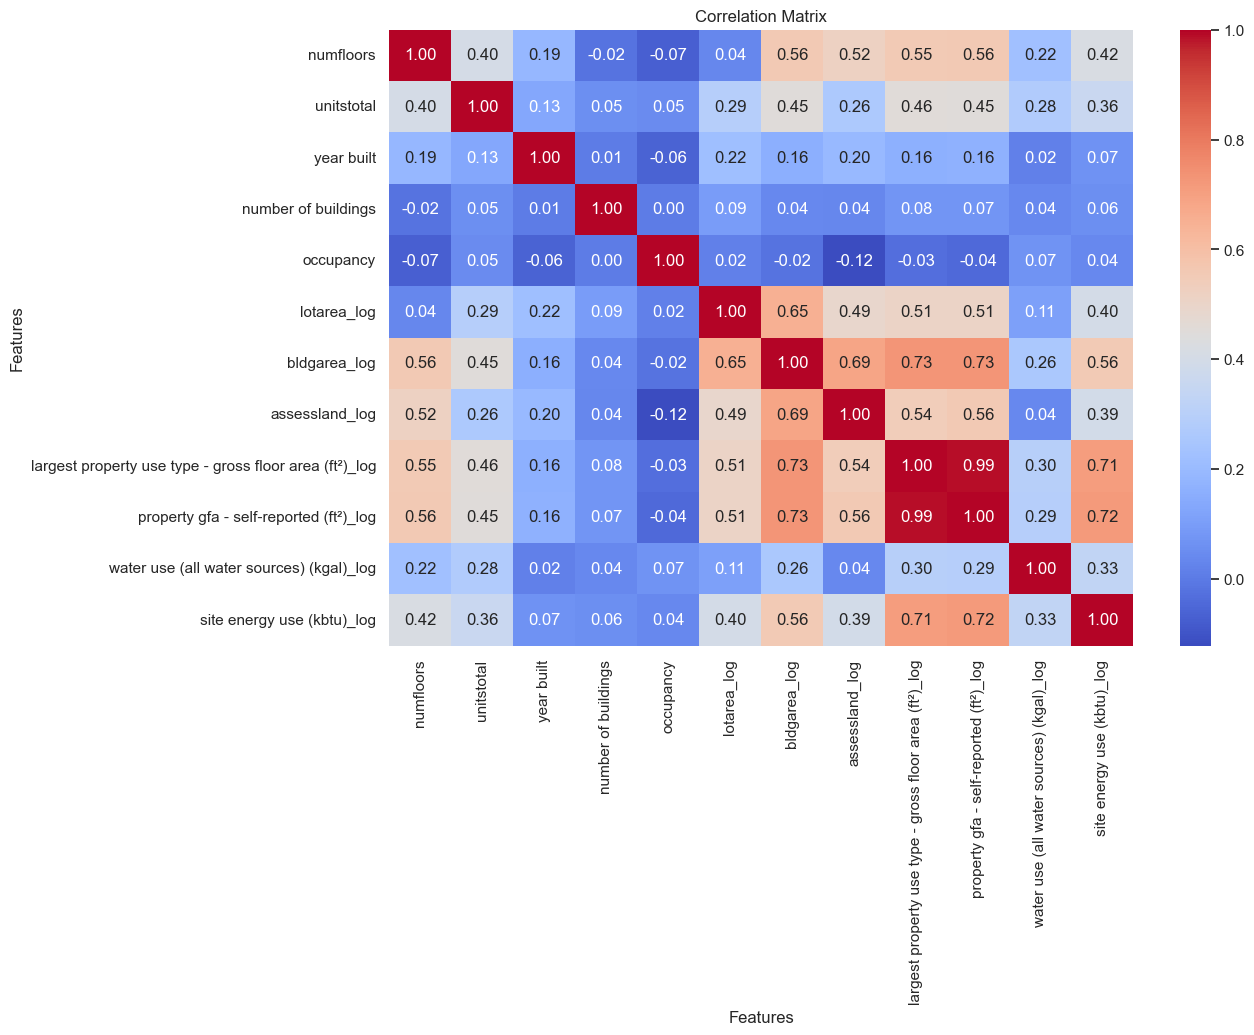

In [177]:
columns_to_plot = [
    'lotarea_log',
    'bldgarea_log','numbldgs','numfloors',
    
    'assessland_log',
    'site energy use (kbtu)_log','largest property use type - gross floor area (ft²)_log',
    'property gfa - self-reported (ft²)_log' 
]
# 'total (location-based) ghg emissions (metric tons co2e)_log',
# Set the size of the figure
plt.figure(figsize=(12, 8))
#corr_matrix = (df_e_lt[columns_to_plot]).corr()
corr_matrix = df_e_lt_numeric.corr()
# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add title and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()


In [178]:
df_e_lt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8708 entries, 0 to 9721
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   borough_x                                               8708 non-null   object 
 1   numfloors                                               8708 non-null   float64
 2   unitstotal                                              8708 non-null   float64
 3   postal code                                             8708 non-null   object 
 4   year built                                              8708 non-null   int64  
 5   construction status                                     8708 non-null   object 
 6   number of buildings                                     8708 non-null   int64  
 7   occupancy                                               8708 non-null   int64  
 8   primary property type - self selected      

In [179]:
df_e_lt.isna().sum()

borough_x                                                 0
numfloors                                                 0
unitstotal                                                0
postal code                                               0
year built                                                0
construction status                                       0
number of buildings                                       0
occupancy                                                 0
primary property type - self selected                     0
lotarea_log                                               0
bldgarea_log                                              0
assessland_log                                            0
largest property use type - gross floor area (ft²)_log    0
property gfa - self-reported (ft²)_log                    0
water use (all water sources) (kgal)_log                  0
site energy use (kbtu)_log                                0
dtype: int64

In [180]:
#pip install geopandas

In [181]:
#pip install fiona shapely descartes

In [182]:
df_e_lt= df_e_lt.dropna()

In [183]:
df_e_lt.shape

(8708, 16)

In [185]:
# Splitting the data
target_energy_efficiency = 'site energy use (kbtu)_log'

#X_e = df_e_c_dropped.select_dtypes(exclude=['object'])
X = df_e_lt.drop('site energy use (kbtu)_log',axis=1)

y = df_e_lt[target_energy_efficiency]

y.shape, X.shape

((8708,), (8708, 15))

In [187]:
#Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25, random_state=42)

In [188]:
print(X_train.columns)


Index(['borough_x', 'numfloors', 'unitstotal', 'postal code', 'year built',
       'construction status', 'number of buildings', 'occupancy',
       'primary property type - self selected', 'lotarea_log', 'bldgarea_log',
       'assessland_log',
       'largest property use type - gross floor area (ft²)_log',
       'property gfa - self-reported (ft²)_log',
       'water use (all water sources) (kgal)_log'],
      dtype='object')


In [189]:
# Create a list of categorical column names
cat = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
cat

['borough_x',
 'postal code',
 'construction status',
 'primary property type - self selected']

In [190]:
cat = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
cat_exception = [''] #postal code
cat_up = [col for col in cat if col not in cat_exception]
cat_up 

['borough_x',
 'postal code',
 'construction status',
 'primary property type - self selected']

In [191]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

# Instantiate transformers

ohe = OneHotEncoder(drop='first', sparse=False,handle_unknown='ignore')


In [192]:
# Transform the categorical columns
X_train_encoded = ohe.fit_transform(X_train[cat_up])
X_test_encoded = ohe.transform(X_test[cat_up])

# Convert the transformed array back into a DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, 
                                  columns=ohe.get_feature_names_out(cat_up), 
                                  index=X_train.index)

# Drop the original categorical columns from X_train
X_train.drop(columns=cat_up, inplace=True)

# Concatenate the remaining columns of X_train with the new one-hot encoded columns
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)


/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [193]:
# Transform the categorical columns in X_test using the already fitted ohe
X_test_encoded = ohe.transform(X_test[cat_up])

# Convert the transformed array back into a DataFrame
X_test_encoded_df = pd.DataFrame(X_test_encoded, 
                                 columns=ohe.get_feature_names_out(cat_up), 
                                 index=X_test.index)

# Drop the original categorical columns from X_test
X_test.drop(columns=cat_up, inplace=True)

# Concatenate the remaining columns of X_test with the new one-hot encoded columns
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)


/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [194]:
X_train.shape, y_train.shape

((6531, 265), (6531,))

In [195]:
X_test.shape

(2177, 265)

In [196]:
df_e_lt.isna().sum()

borough_x                                                 0
numfloors                                                 0
unitstotal                                                0
postal code                                               0
year built                                                0
construction status                                       0
number of buildings                                       0
occupancy                                                 0
primary property type - self selected                     0
lotarea_log                                               0
bldgarea_log                                              0
assessland_log                                            0
largest property use type - gross floor area (ft²)_log    0
property gfa - self-reported (ft²)_log                    0
water use (all water sources) (kgal)_log                  0
site energy use (kbtu)_log                                0
dtype: int64

In [197]:
df_e_lt.shape

(8708, 16)

In [ ]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
#X_train_e_sc = scaler.fit_transform(X_train_e)
#X_test_e_sc = scaler.transform(X_test_e)


In [215]:
X_train.shape

(6531, 265)

## Model with Linear Regression 

In [199]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression(n_jobs=50)
#model_energy.fit(X_train_e_sc, y_train_e)
lr_model.fit(X_train, y_train)

# Make predictions and evaluate the model 
y_pred_lr = lr_model.predict(X_train)
mse_e_lr = mean_squared_error(y_train, y_pred_lr)

#crossvalidation score
mse_scores_lr = -(cross_val_score(lr_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_lr_mean =mse_scores_lr.mean()
rsquared_lr = lr_model.score(X_train, y_train)
accuracy_lr = cross_val_score(lr_model, X_train,y_train).mean()

print("=== Linear Regression MODEL SUMMARY==")
print("Mean Squared Error for Energy Efficiency model:", mse_e_lr)
print("R-Squared", rsquared_lr) #explain variation in the target
print("Mean MSE:-cross val ", mse_scores_lr_mean)
print("Croos validate R-Squared",accuracy_lr)

=== Linear Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.5766119482716501
R-Squared 0.5650515715169344
Mean MSE:-cross val  2.176234405072893e+17
Croos validate R-Squared -3.7193673793185645e+17


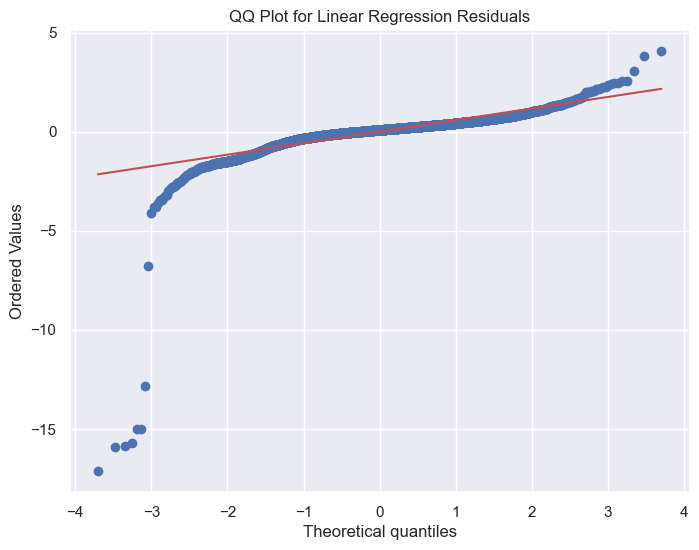

In [200]:
# Residuals calculation
residuals = y_train - y_pred_lr

# QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot for Linear Regression Residuals')
plt.show()

In [201]:
from sklearn.linear_model import Ridge


# Initialize and train the Ridge Regression model with L2 regularization
ridge_model = Ridge(alpha=0.01)  
ridge_model.fit(X_train, y_train)

# Make predictions and evaluate the model 
y_pred_ridge = ridge_model.predict(X_train)
mse_e_ridge = mean_squared_error(y_train, y_pred_ridge)

# Cross-validation score
mse_scores_ridge = -(cross_val_score(ridge_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_ridge_mean = mse_scores_ridge.mean()
rsquared_ridge = ridge_model.score(X_train, y_train)
accuracy_ridge = cross_val_score(ridge_model, X_train, y_train).mean()

print("=== Ridge Regression MODEL SUMMARY==")
print("Mean Squared Error for Energy Efficiency model:", mse_e_ridge)
print("R-Squared:", rsquared_ridge)  # Explains variation in the target
print("Mean MSE - Cross Val:", mse_scores_ridge_mean)
print("Cross validate R-Squared:", accuracy_ridge)


=== Ridge Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.5766204452977871
R-Squared: 0.565045162062229
Mean MSE - Cross Val: 0.6506558262896638
Cross validate R-Squared: 0.519574102403894


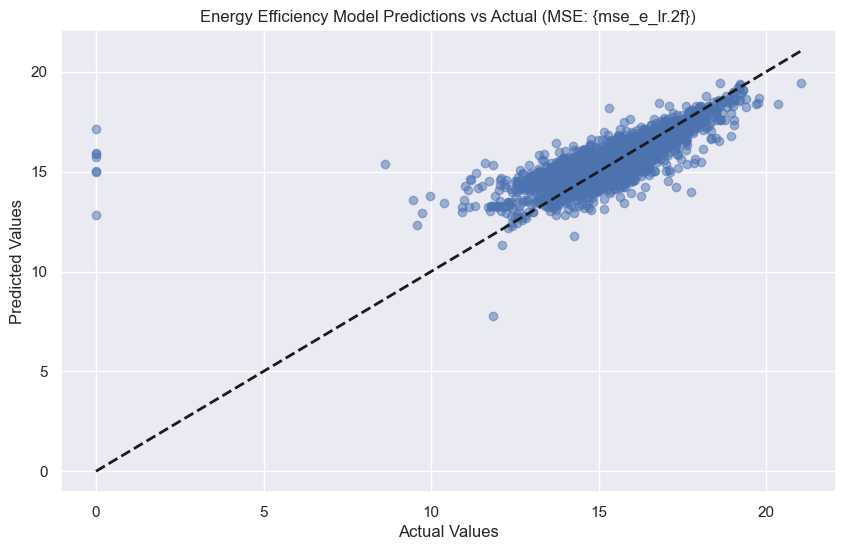

In [202]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_lr, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Energy Efficiency Model Predictions vs Actual (MSE: {mse_e_lr.2f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


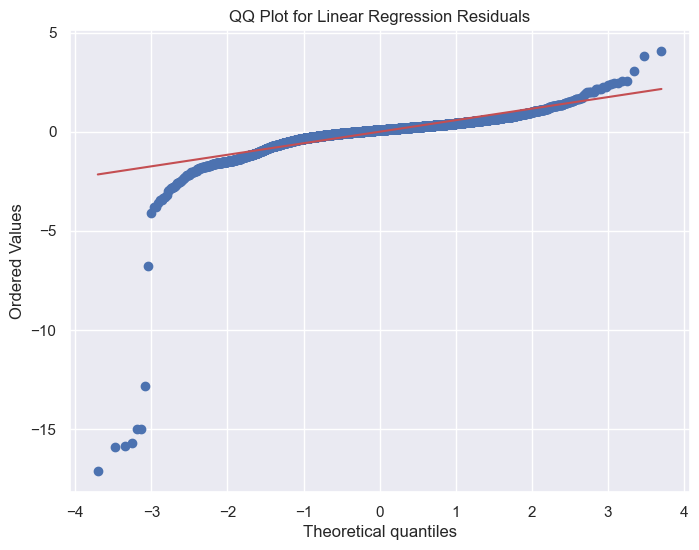

In [203]:
# Residuals calculation
residuals = y_train - y_pred_ridge

# QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot for Linear Regression Residuals')
plt.show()

In [204]:
# Get feature names
feature_names = X_train.columns

# Get coefficients
coefficients = lr_model.coef_

# Lets create a DataFrame from the features
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

# Sort the features by their absolute coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display the feature importances
feature_importance

Coefficient  \
primary property type - self selected_other - s...     2.816845   
postal code_10020                                     -2.542532   
primary property type - self selected_parking         -2.113051   
primary property type - self selected_self-stor...    -2.049299   
primary property type - self selected_college/u...    -2.009634   
...                                                         ...   
occupancy                                              0.007136   
numfloors                                              0.003250   
year built                                            -0.001922   
number of buildings                                   -0.000670   
unitstotal                                             0.000192   

                                                    Absolute Coefficient  
primary property type - self selected_other - s...              2.816845  
postal code_10020                                               2.542532  
primary property type - self selected_parking                   2.113051  
primary property type - self selected_self-stor...              2.049299  
primary property type - self selected_college/u...              2.009634  
...                                                                  ...  
occupancy                                                       0.007136  
numfloors                                                       0.003250  
year built                                                      0.001922  
number of buildings                                             0.000670  
unitstotal                                                      0.000192  

[265 rows x 2 columns]

## Model with Random Forest Regressor

In [220]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100,max_depth=50, max_features='sqrt', min_samples_leaf=1, min_samples_split=6,random_state=42)
#
#Fitting the model 
rf_model.fit(X_train, y_train)

#calculate y_pred_rf on train

y_pred_train_rf = rf_model.predict(X_train)
mse_e_rf = mean_squared_error(y_train, y_pred_train_rf)
#Cross validation 
mse_scores_rf = -(cross_val_score(rf_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))


mse_scores_rf = -(cross_val_score(rf_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_rf_mean =mse_scores_rf.mean()
rsquared_rf = r2_score(y_train, y_pred_train_rf)
accuracy_rf = cross_val_score(rf_model, X_train,y_train).mean()

print("===Random Forest Regressor MODEL SUMMARY==")
print("Mean Squared Error for RF model:", mse_e_rf)
print("R-Squared", rsquared_lr) #explain variation in the target
print("Mean MSE:-cross val ", mse_scores_rf_mean)
print("Model cross val accuracy",accuracy_rf)

'''
===Random Forest Regressor MODEL SUMMARY==
Mean Squared Error for RF model: 0.08944003759196113
R-Squared 0.5650515715169344
Mean MSE:-cross val  0.6631349053898484
Model cross val accuracy 0.5088258127146561


Best parameters found:  {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best cross-validated accuracy: -0.60

===Random Forest Regressor MODEL SUMMARY==
Mean Squared Error for RF model: 0.2788208454876623
R-Squared 0.5650515715169344
Mean MSE:-cross val  0.6132082299576429
Model cross val accuracy 0.5421275544796009

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
Best cross-validated accuracy: -0.61

===Random Forest Regressor MODEL SUMMARY==
Mean Squared Error for RF model: 0.21942055619744522
R-Squared 0.5650515715169344
Mean MSE:-cross val  0.6147674276010403
Model cross val accuracy 0.5450587493279991


Best parameters found:  {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
Best cross-validated accuracy: -0.61

===Random Forest Regressor MODEL SUMMARY==
Mean Squared Error for RF model: 0.2222396495406416
R-Squared 0.5650515715169344
Mean MSE:-cross val  0.6151388697311381
Model cross val accuracy 0.5458572020639919


'''

===Random Forest Regressor MODEL SUMMARY==
Mean Squared Error for RF model: 0.2222396495406416
R-Squared 0.5650515715169344
Mean MSE:-cross val  0.6151388697311381
Model cross val accuracy 0.5458572020639919


"\n===Random Forest Regressor MODEL SUMMARY==\nMean Squared Error for RF model: 0.08944003759196113\nR-Squared 0.5650515715169344\nMean MSE:-cross val  0.6631349053898484\nModel cross val accuracy 0.5088258127146561\n\n\nBest parameters found:  {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}\nBest cross-validated accuracy: -0.60\n\n===Random Forest Regressor MODEL SUMMARY==\nMean Squared Error for RF model: 0.2788208454876623\nR-Squared 0.5650515715169344\nMean MSE:-cross val  0.6132082299576429\nModel cross val accuracy 0.5421275544796009\n\nBest parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}\nBest cross-validated accuracy: -0.61\n\n===Random Forest Regressor MODEL SUMMARY==\nMean Squared Error for RF model: 0.21942055619744522\nR-Squared 0.5650515715169344\nMean MSE:-cross val  0.6147674276010403\nModel cross val accuracy 0.545058749327999

In [ ]:
rf_model_un= RandomForestRegressor()
rf_model_un.fit(X_train, y_train)
rf_model_un.score(X_train, y_train)


In [ ]:
cross_val_score(rf_model_un, X_train, y_train, cv=5).mean()

In [216]:
##### Using Grid search to look for the best parameters

param_grid = {
    'max_depth': [50, 100, 150],
    'min_samples_leaf': [1,5,10],
    'min_samples_split':[6, 8, 10],
    'n_estimators':[100,150,200],
    'max_features':['auto','sqrt', 'log2', 0.5,None ]
}
 #'max_depth', 'min_samples_leaf','min_samples_split',n_estimators and max_features ?
rf_model = RandomForestRegressor()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))

/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 2025.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/base.py", line 637, in 

Best parameters found:  {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best cross-validated accuracy: -0.60


In [ ]:
Best parameters found:  {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
Best cross-validated accuracy: -0.61

In [ ]:
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
Best cross-validated accuracy: -0.61

In [ ]:
Best parameters found:  {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best cross-validated accuracy: -0.60

In [ ]:
import matplotlib.pyplot as plt

# Actual vs. Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train_rf, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)  # Diagonal line
plt.show()

## Model with Decision Tree Regressor

#instantiation 
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=1, min_samples_split=4,max_features=50,random_state=42)
#fitting the model 
dt_model.fit(X_train, y_train)


#calculate y_pred_rf on train

y_pred_train_dt = dt_model.predict(X_train)

#Cross validation 
mse_scores = -(cross_val_score(dt_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))


mse_e_dt = mean_squared_error(y_train, y_pred_train_dt)
#Cross validation 
mse_scores_dt = -(cross_val_score(rf_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))


mse_scores_dt = -(cross_val_score(dt_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_dt_mean =mse_scores_dt.mean()
rsquared_dt = r2_score(y_train, y_pred_train_dt)
accuracy_dt = cross_val_score(dt_model, X_train,y_train).mean()

# Calculate and print metrics on training set
print("===Decision Tree Regressor MODEL SUMMARY==")
print("Mean Squared Error Training:",mse_scores_dt_mean)
print("R-squared  Training:", rsquared_dt)
print("Mean Squared average:/ Crossval", mse_scores_dt_mean)
print("Model cross validate RSquared",accuracy_dt)


# Get feature names
feature_names = X_train.columns

# Get feature importances from the decision tree model
importances = dt_model.feature_importances_

# Create a DataFrame from the features and importances
feature_importance = pd.DataFrame(importances, index=feature_names, columns=['Importance'])

# Sort the features by their importances
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the feature importances
feature_importance

#Visualizing Predictions
import matplotlib.pyplot as plt
y_pred_train_dt = dt_model.predict(X_train)

plt.scatter(y_train, y_pred_train_dt, alpha=0.5)

# Line for perfect predictions
plt.plot(y_train, y_train, color='red', linewidth=2) 

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Random Forest on training")

plt.show()

#Using Grid search to look for the best parameters

param_grid = {
    'max_depth': [2, 4, 8],
    'min_samples_leaf': [1,2,3],
    'min_samples_split':[4,6,8],
}

dt_model = DecisionTreeRegressor()

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))


## Model with Gradient Descent XGboost


In [ ]:
#pip install xgboost

In [ ]:
X_train.info()

In [ ]:
#X_train=X_train.drop('postal code')
X_train = X_train.reset_index(drop=True)
X_train

In [236]:
import xgboost as xgb

# Create the XGBoost instance
xgb_model = xgb.XGBRegressor(n_estimators =100, max_depth = 5, max_features = 'auto', min_samples_leaf =1, min_samples_plit=2) #n_estimators=10, learning_rate=0.1, max_depth=10
#'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 6

#Best parameters found:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
#Best cross-validated accuracy: -0.66

#'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}

#n_estimators=10, learning_rate=0.1, max_depth=10

# Fit the model
xgb_model.fit(X_train, y_train)



/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:10:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_plit" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_features='auto',
             max_leaves=None, min_child_weight=None, min_samples_leaf=1,
             min_samples_plit=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, ...)

In [237]:

#calculate y_pred_xgb on train

y_pred_train_xgb = xgb_model.predict(X_train)

#Cross validation 
mse_scores_xgb = -(cross_val_score(xgb_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_xgb_mean =mse_scores_xgb.mean()

mse_e_xgb = mean_squared_error(y_train, y_pred_train_xgb)



mse_scores_xgb = -(cross_val_score(xgb_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
rsquared_xgb = r2_score(y_train, y_pred_train_xgb)
accuracy_xgb = cross_val_score(xgb_model, X_train,y_train).mean()

# Calculate and print metrics on training set
print("=== Gradient Descent XGBoost MODEL SUMMARY==")
print("Mean Squared Error Training:",mse_scores_xgb_mean)
print("R-squared  Training:", rsquared_xgb)
print("Mean Squared average:/ Crossval", mse_scores_xgb_mean)
print("Model accuracy",accuracy_xgb)

'''
=== Gradient Descent XGBoost MODEL SUMMARY==
Mean Squared Error Training: 0.663993501132088
R-squared  Training: 0.9010970163399186
Mean Squared average:/ Crossval 0.663993501132088
Model accuracy 0.5022447311630787


Best parameters found:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
Best cross-validated accuracy: -0.66

=== Gradient Descent XGBoost MODEL SUMMARY==
Mean Squared Error Training: 0.663993501132088
R-squared  Training: 0.9010970163399186
Mean Squared average:/ Crossval 0.663993501132088
Model accuracy 0.5022447311630787


Best parameters found:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
Best cross-validated accuracy: -0.66

=== Gradient Descent XGBoost MODEL SUMMARY==
Mean Squared Error Training: 0.663993501132088
R-squared  Training: 0.9010970163399186
Mean Squared average:/ Crossval 0.663993501132088
Model accuracy 0.5022447311630787


Best parameters found:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated accuracy: -0.66

=== Gradient Descent XGBoost MODEL SUMMARY==
Mean Squared Error Training: 0.663993501132088
R-squared  Training: 0.9010970163399186
Mean Squared average:/ Crossval 0.663993501132088
Model accuracy 0.5022447311630787

'''


/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:10:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_plit" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:10:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_plit" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:10:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_plit" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [

=== Gradient Descent XGBoost MODEL SUMMARY==
Mean Squared Error Training: 0.6504803520235186
R-squared  Training: 0.8659623651408004
Mean Squared average:/ Crossval 0.6504803520235186
Model accuracy 0.5059108579676572


"\n=== Gradient Descent XGBoost MODEL SUMMARY==\nMean Squared Error Training: 0.663993501132088\nR-squared  Training: 0.9010970163399186\nMean Squared average:/ Crossval 0.663993501132088\nModel accuracy 0.5022447311630787\n\n\nBest parameters found:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}\nBest cross-validated accuracy: -0.66\n\n=== Gradient Descent XGBoost MODEL SUMMARY==\nMean Squared Error Training: 0.663993501132088\nR-squared  Training: 0.9010970163399186\nMean Squared average:/ Crossval 0.663993501132088\nModel accuracy 0.5022447311630787\n\n\nBest parameters found:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}\nBest cross-validated accuracy: -0.66\n\n=== Gradient Descent XGBoost MODEL SUMMARY==\nMean Squared Error Training: 0.663993501132088\nR-squared  Training: 0.9010970163399186\nMean Squared average:/ Crossval 0.663993501132088\nModel a

In [ ]:
##PLOT BEST TREE (pp) AAND EXPLIN IN

In [235]:
#Using Grid search to look for the best parameters



param_grid = {
    'max_depth': [None, 30, 80],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 120, 140],
    'max_features': ['auto']
}
xgb_model = xgb.XGBRegressor()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))

/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:08:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:08:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:08:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning

/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:09:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:09:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:09:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning

/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:09:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:09:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:09:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning

/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:09:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:09:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:09:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning

/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:09:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:09:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:09:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning

KeyboardInterrupt: 

## Baseline Models Summary 
'So far the linear Regression is our best model with the higest cross validation score'


''''
=== Linear Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.03378337559569033
R-Squared 0.968041818682259
Mean MSE:-cross val  2745772250922531.5
Model accuracy 0.9674890593752579

===Random Forest Regressor MODEL SUMMARY==
Mean Squared Error Training: 0.034340207025185754
R-squared  Training: 0.967515070852196
Mean Squared average:/ Crossval 0.05115722663194122
Mean MSE:-cross val  0.05115722663194122

===Decision Tree Regressor MODEL SUMMARY==
Mean Squared Error Training: 0.014024258826550916
R-squared  Training: 0.9867334214381165
Mean Squared average:/ Crossval 0.2052413055027733
Model accuracy 0.9192932718266695

=== Gradient Descent XGBoost MODEL SUMMARY==
Mean Squared Error Training: 0.16014945615962706
R-squared  Training: 0.8485028429622088
Mean Squared average:/ Crossval 0.19434603451401064
Model accuracy 0.8282779029186195
'''

In [ ]:
## Best Model Evaluation on the test set

#calculate y_pred_rf  on test set
#y_pred_lr = lr_model.predict(X_test)

# Calculate and print metrics on test
#print("Mean Squared Error Test:", mean_squared_error(y_test, y_pred_lr))
#print("R-squared Test::", r2_score(y_test, y_pred_lr))
#print("model score:",lr_model.score(X_test,y_test))


In [ ]:
##  Model 1 Summary 
print("=== Linear Regression MODEL SUMMARY==")
print("Mean Squared Error for Energy Efficiency model:", mse_e_lr)
print("R-Squared", rsquared_lr) #explain variation in the target
print("Mean MSE:-cross val ", mse_scores_lr_mean)
print("Model accuracy",accuracy_lr)
print("===Random Forest Regressor MODEL SUMMARY==")
print("Mean Squared Error for RF model:", mse_e_rf)
print("R-Squared", rsquared_lr) #explain variation in the target
print("Mean MSE:-cross val ", mse_scores_rf_mean)
print("Model accuracy",accuracy_rf)
print("===Decision Tree Regressor MODEL SUMMARY==")
print("Mean Squared Error Training:",mse_scores_dt_mean)
print("R-squared  Training:", rsquared_dt)
print("Mean Squared average:/ Crossval", mse_scores_dt_mean)
print("Model accuracy",accuracy_dt)
print("=== Gradient Descent XGBoost MODEL SUMMARY==")
print("Mean Squared Error Training:",mse_scores_xgb_mean)
print("R-squared  Training:", rsquared_xgb)
print("Mean Squared average:/ Crossval", mse_scores_xgb_mean)
print("Model accuracy",accuracy_dt)
